
### Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

### Domain:

Cement manufacturing

### Context:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information:
- Cement: measured in kg in a m3 mixture 
- Blast: measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture 
- Age: day (1~365)
- Concrete compressive strength :measured in MPa


### Objective:

Modeling of strength of high performance concrete using Machine Learning

### Importing Relevant Libraries

In [376]:
#for data manipulation
import pandas as pd
import numpy as np
#for ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
#data tranformation and feature generation
from scipy.stats import zscore,norm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from matplotlib import pyplot


### Reading the dataset

In [2]:
#reading the data

data=pd.read_csv("concrete.csv")

In [3]:
data.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

-  From above table we found that there are 8 independent variable and one dependent variable
- All the records are numeric

## Univariate Analysis

In [4]:
data.dtypes #to find the data types of each attributes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
data.shape #no of rows and columns in the dataframe

(1030, 9)

There are 1030 rows and 9 columns in the given dataset

#### Checking the presence of missing values

In [6]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no missing values in the given dataset

#### Descriptive statistics of each & every column

In [7]:
data.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

#### Five Point Summary

In [8]:
summary=data.describe().transpose()
summary[['min','25%','50%','75%','max']]


min      25%      50%       75%     max
cement        102.00  192.375  272.900   350.000   540.0
slag            0.00    0.000   22.000   142.950   359.4
ash             0.00    0.000    0.000   118.300   200.1
water         121.80  164.900  185.000   192.000   247.0
superplastic    0.00    0.000    6.400    10.200    32.2
coarseagg     801.00  932.000  968.000  1029.400  1145.0
fineagg       594.00  730.950  779.500   824.000   992.6
age             1.00    7.000   28.000    56.000   365.0
strength        2.33   23.710   34.445    46.135    82.6

In [9]:
data.skew(numeric_only = True)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

Skewness with positive values indicates data is skewed towards right. Skewness with negative values indicates data is skewed towards left

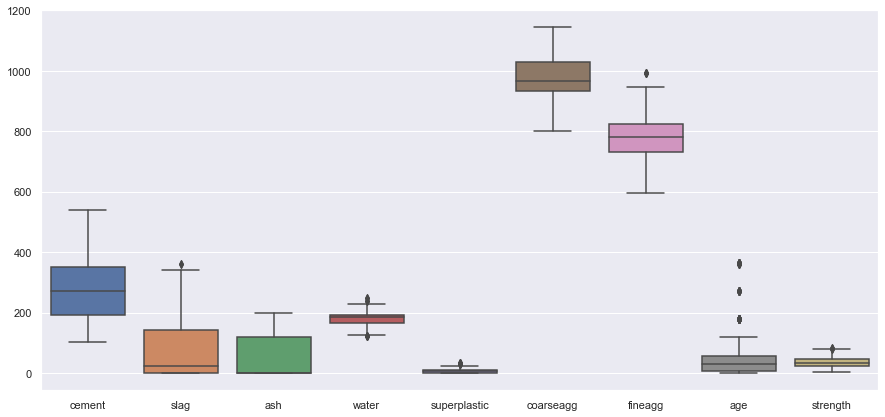

In [10]:
# A quick check to find columns that contain outliers
fig=plt.figure(figsize=(15,7))
ax=sns.boxplot(data=data,orient='v')

From the above graph we found that the attributes other than cement,ash and coarseagg are having outliers

### Distribution of Independent attributes

#### cement

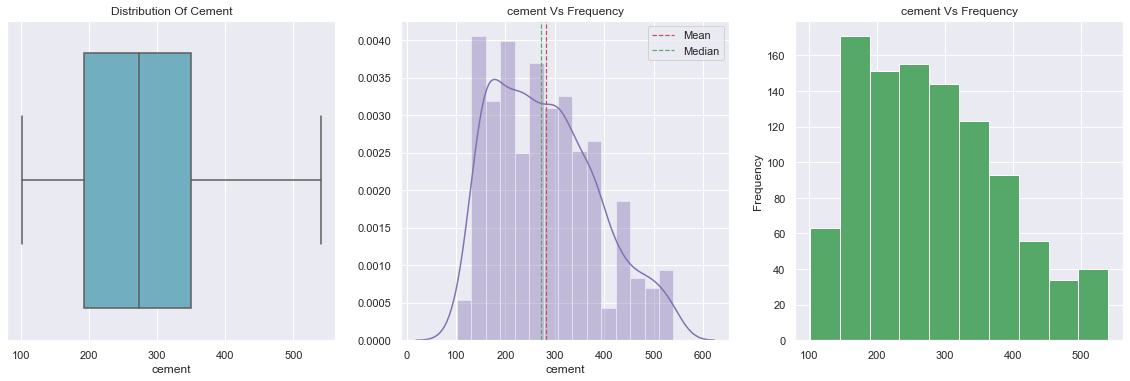

In [11]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.cement,showfliers=True,color="c").set_title("Distribution Of Cement")
# distplot
ax=plt.subplot(3,3,2)
sns.distplot(data.cement,color='m').set_title("cement Vs Frequency")
ax.axvline(data.cement.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.cement.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')
#histogram plot
plt.subplot(3,3,3)
data.cement.plot.hist(color='g').set_title("cement Vs Frequency");

#### Observation
- The column is almost **Normally Distributed**
- Mean and Median are almost the same
- Most of the values are between **192 to 350**
- There are no outliers

#### slag

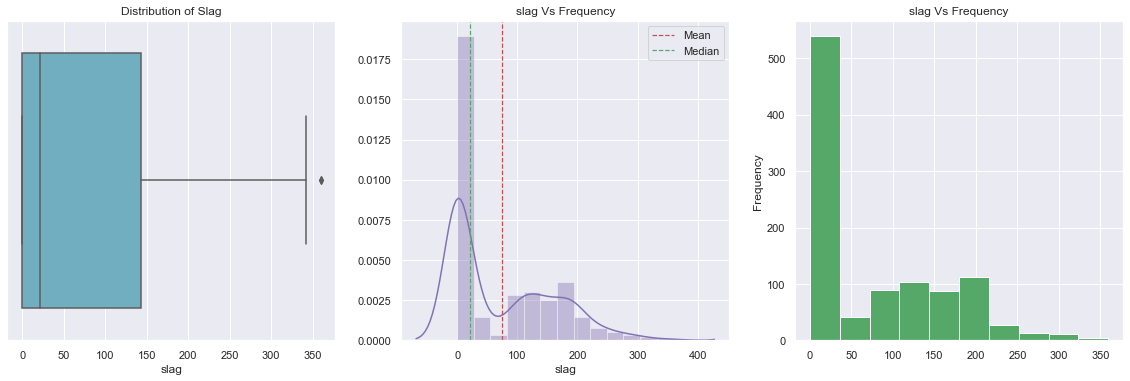

In [12]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.slag,showfliers=True,color='c').set_title("Distribution of Slag")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.slag,color='m').set_title("slag Vs Frequency")
ax.axvline(data.slag.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.slag.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.slag.plot.hist(color='g').set_title("slag Vs Frequency");

#### Observation
- The column is **skewed towards right**
- Mean and Median are not the same
- **25%** of the values are **0**
- Most of the values are between **0 to 142**
- There are  outliers
- It has **Three Gaussians** 

#### Ash

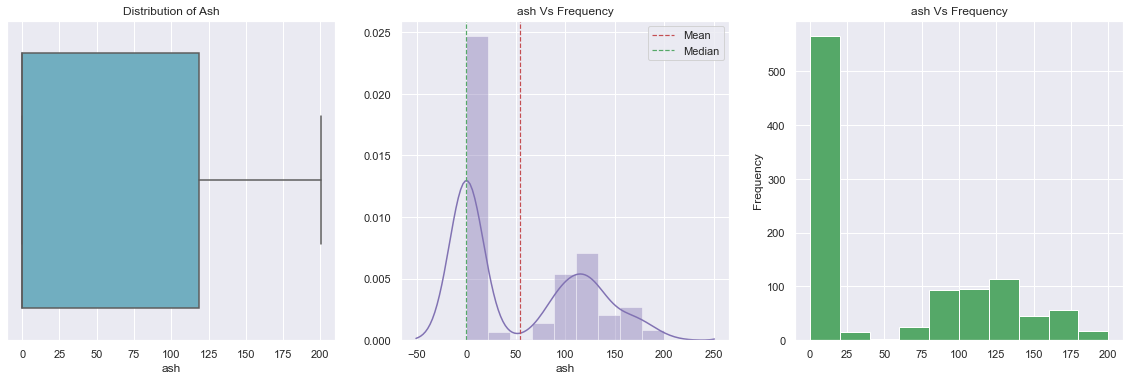

In [13]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.ash,showfliers=True,color='c').set_title("Distribution of Ash")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.ash,color='m').set_title("ash Vs Frequency")
ax.axvline(data.ash.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.ash.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.ash.plot.hist(color='g').set_title("ash Vs Frequency");

#### Observation
- The column is **skewed towards right**
- **50%** of the values are **0**
- Mean and Median are not the same
- Most of the values are between **0 to 118**
- There are no outliers
- It has **Two Gaussians**

#### water

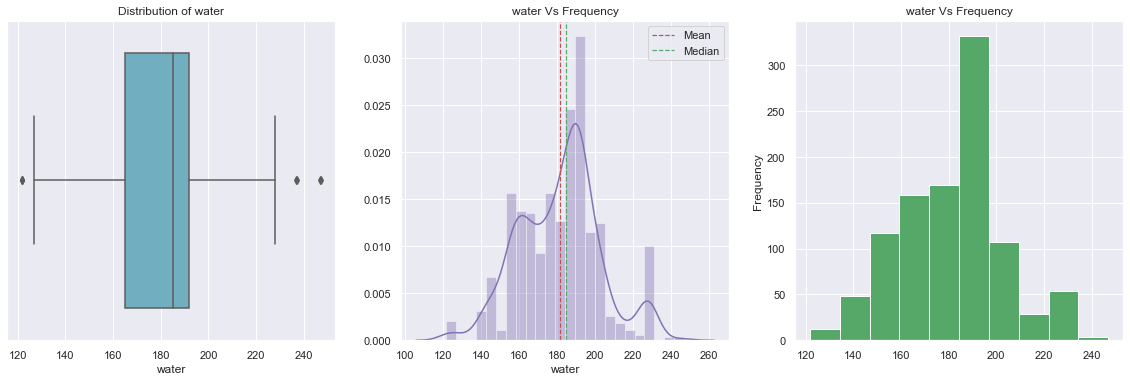

In [14]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.water,showfliers=True,color='c').set_title("Distribution of water")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.water,color='m').set_title("water Vs Frequency")
ax.axvline(data.water.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.water.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.water.plot.hist(color='g').set_title("water Vs Frequency");

#### Observation
- The column is **slightly skewed towards left**
- Mean and Median are not the same
- Most of the values are between **164 to 192**
- There are  outliers
- It has **Three Gaussians**

#### superplastic

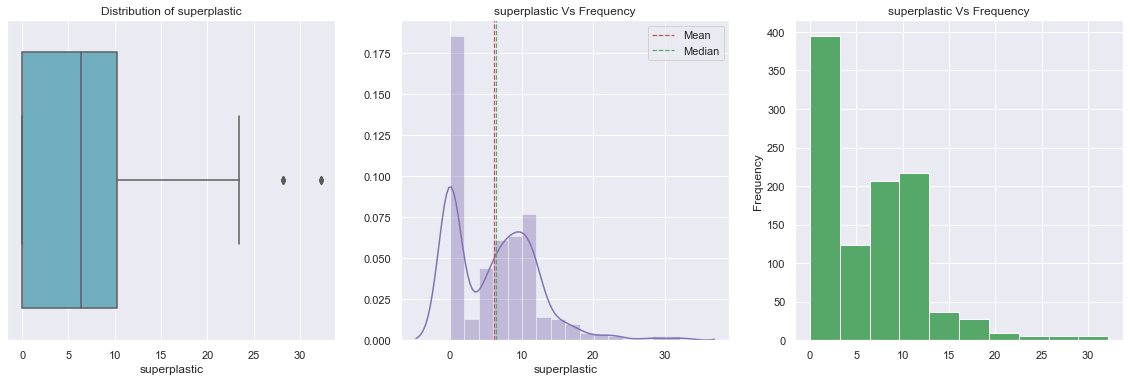

In [15]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.superplastic,showfliers=True,color='c').set_title("Distribution of superplastic")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.superplastic,color='m').set_title("superplastic Vs Frequency")
ax.axvline(data.superplastic.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.superplastic.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.superplastic.plot.hist(color='g').set_title("superplastic Vs Frequency");

#### Observation
- The column is **skewed towards right**
- Mean and Median are almost the same
- **25%** of the values are **0**
- Most of the values are between **0 to 10**
- There are  outliers
- It has **Two Gaussians**

#### coarseagg

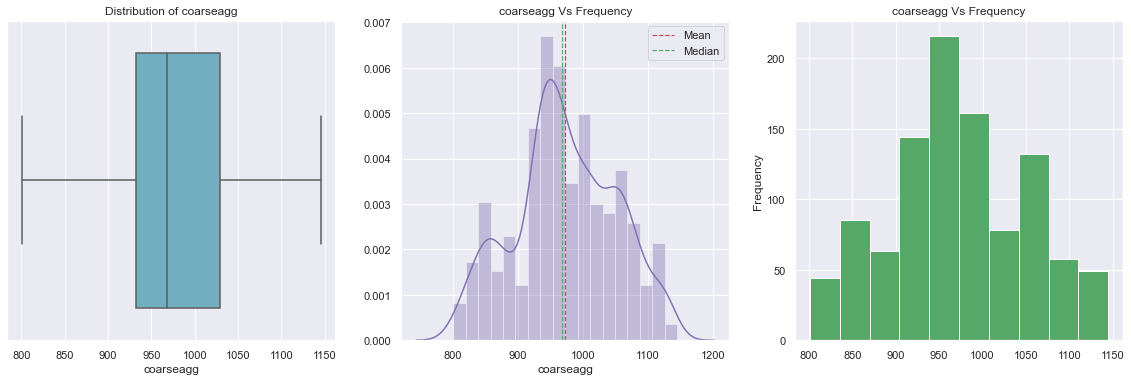

In [16]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.coarseagg,showfliers=True,color='c').set_title("Distribution of coarseagg")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.coarseagg,color='m').set_title("coarseagg Vs Frequency")
ax.axvline(data.coarseagg.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.coarseagg.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.coarseagg.plot.hist(color='g').set_title("coarseagg Vs Frequency");

#### Observation
- The column is almost **Normally Distributed**
- Mean and Median are almost the same
- Most of the values are between **932 to 1029**
- There are no outliers
- It has **Three Gaussians**

#### fineagg

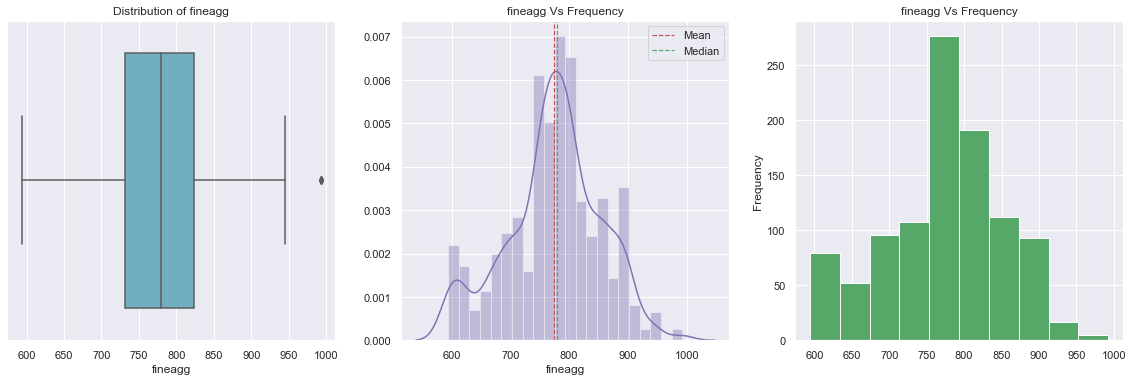

In [17]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.fineagg,showfliers=True,color='c').set_title("Distribution of fineagg")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.fineagg,color='m').set_title("fineagg Vs Frequency")
ax.axvline(data.fineagg.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.fineagg.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.fineagg.plot.hist(color='g').set_title("fineagg Vs Frequency");

#### Observation
- The column is almost **Normally Distributed**
- Mean and Median are almost the same
- Most of the values are between **731 to 824**
- There are  outliers
- It has **Two Gaussians**

#### age

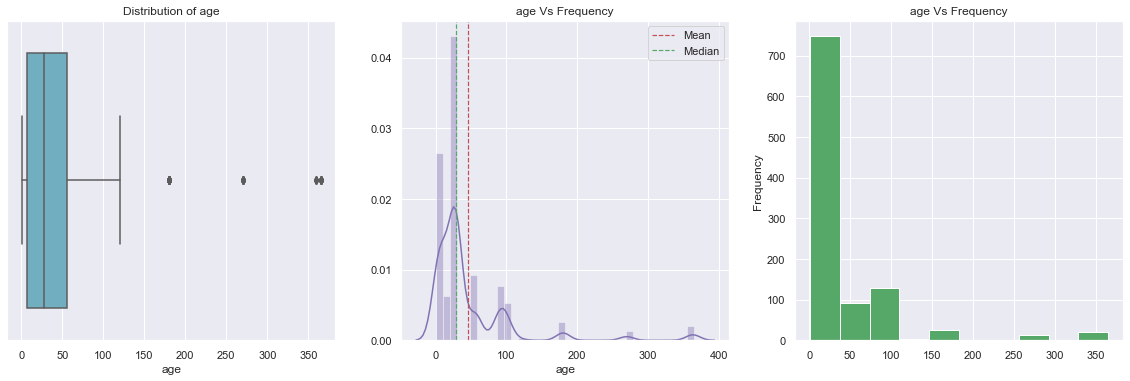

In [18]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.age,showfliers=True,color='c').set_title("Distribution of age")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.age,color='m').set_title("age Vs Frequency")
ax.axvline(data.age.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.age.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.age.plot.hist(color='g').set_title("age Vs Frequency");

#### Observation
- The column is **skewed towards right**
- Mean and Median are not the same
- Most of the values are between **7 to 56**
- There are lot of outliers
- It has **Multiple Gaussians**

In [19]:
agedata=data.copy()
def age_bin(data):
    if data.age <= 30:
        return '1 month'
    if data.age > 30 and data.age <= 60 :
        return '2 months'
    if data.age > 60 and data.age <= 90 :
        return '3 months'
    if data.age > 90 and data.age <= 120 :
        return '4 months'
    if data.age > 120 and data.age <= 150 :
        return '5 months'
    if data.age > 150 and data.age <= 180 :
        return '6 months'
    if data.age > 180 and data.age <= 210 :
        return '7 months'
    if data.age > 210 and data.age <= 240 :
        return '8 months'
    if data.age > 240 and data.age <= 270 :
        return '9 months'
    if data.age > 270 and data.age <= 300 :
        return '10 months'
    if data.age > 300 and data.age <= 330 :
        return '11 months'
    if data.age > 330 :
        return '12 months'
agedata['age_in_months'] = agedata.apply(lambda data:age_bin(data) , axis=1)

1 month      749
2 months      91
4 months      77
3 months      54
6 months      26
12 months     20
9 months      13
Name: age_in_months, dtype: int64


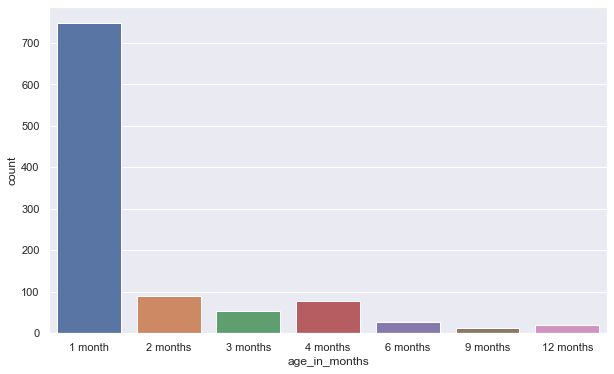

In [20]:
ax=plt.figure(figsize=(10, 6))
sns.countplot(agedata['age_in_months'], order = ['1 month', '2 months', '3 months', '4 months', '6 months', '9 months', '12 months'])
print(agedata['age_in_months'].value_counts())

- From the above plot we found that **one month** bin has maximum  occurence

### Target Column (strength) Distribution

#### strength

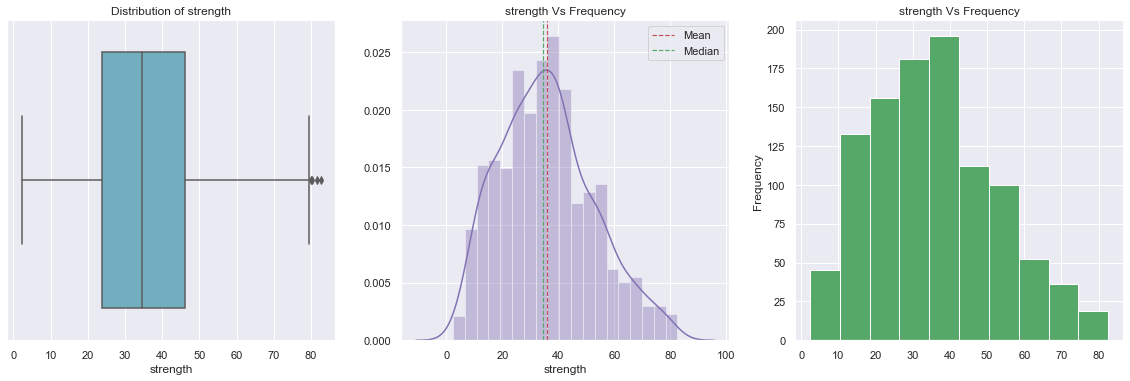

In [21]:
plt.figure(figsize=(20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data.strength,showfliers=True,color='c').set_title("Distribution of strength")

#dist plot
ax=plt.subplot(3,3,2)
sns.distplot(data.strength,color='m').set_title("strength Vs Frequency")
ax.axvline(data.strength.mean(),color='r',linestyle='--',label='Mean',linewidth=1.2)
ax.axvline(data.strength.median(),color='g',linestyle='--',label='Median',linewidth=1.2)
ax.legend(loc='best')

#histogram plot
plt.subplot(3,3,3)
data.strength.plot.hist(color='g').set_title("strength Vs Frequency");

#### Observation
- The column is **skewed towards right**
- Mean and Median are not the same
- **25%** of the values are **0**
- Most of the values are between **0 to 142**
- There are  outliers

### Multivariate Analysis

#### Influence of Different attributes on Strength

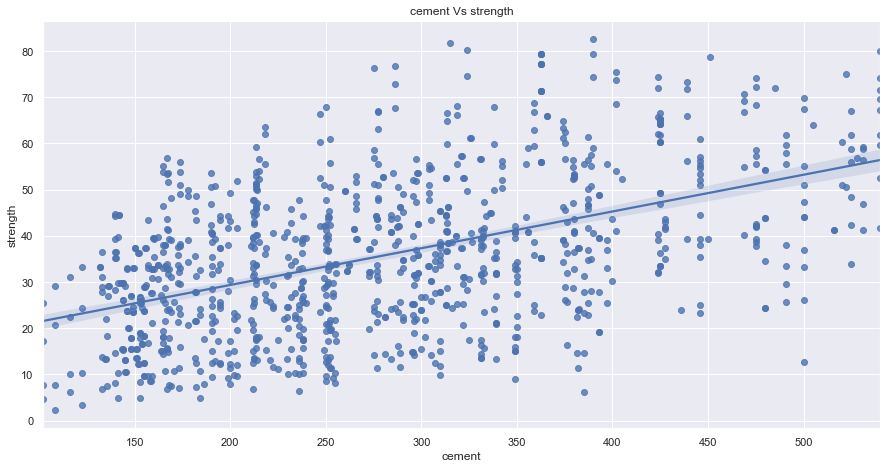

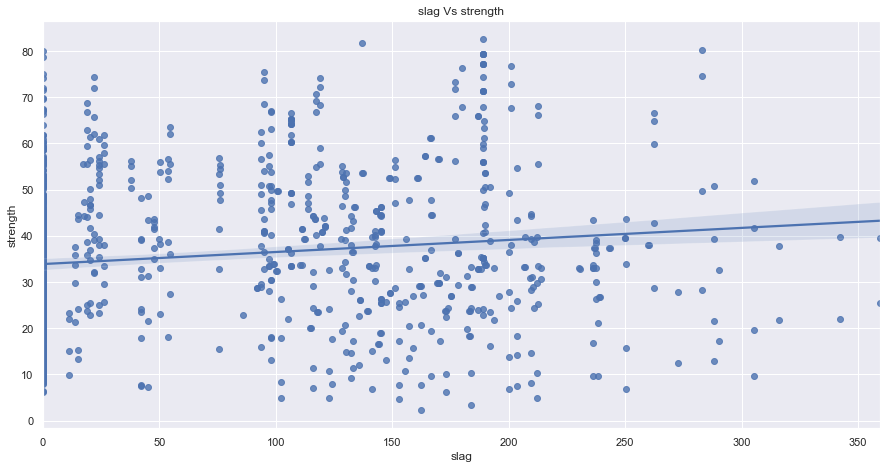

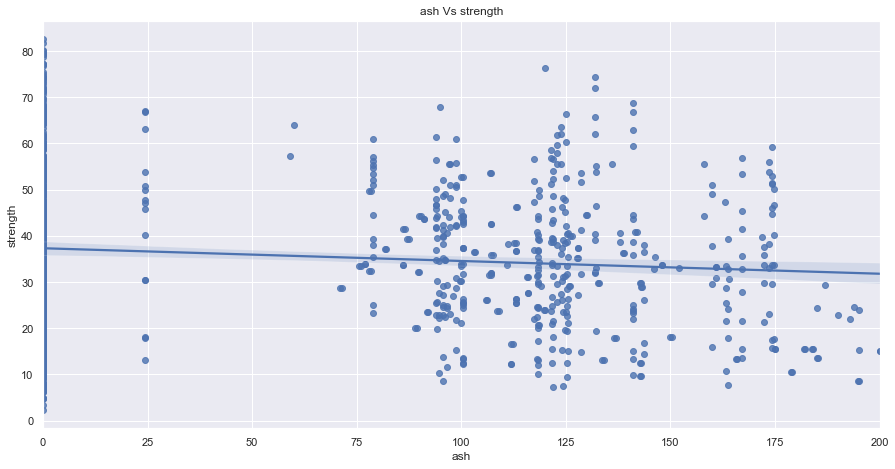

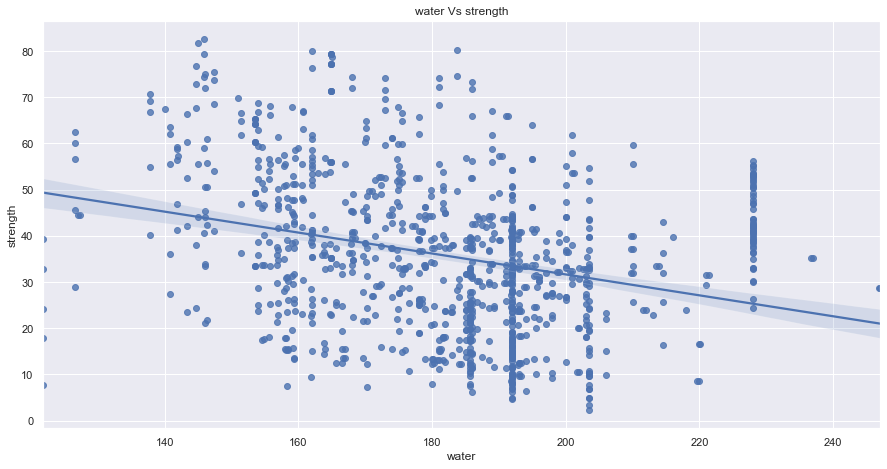

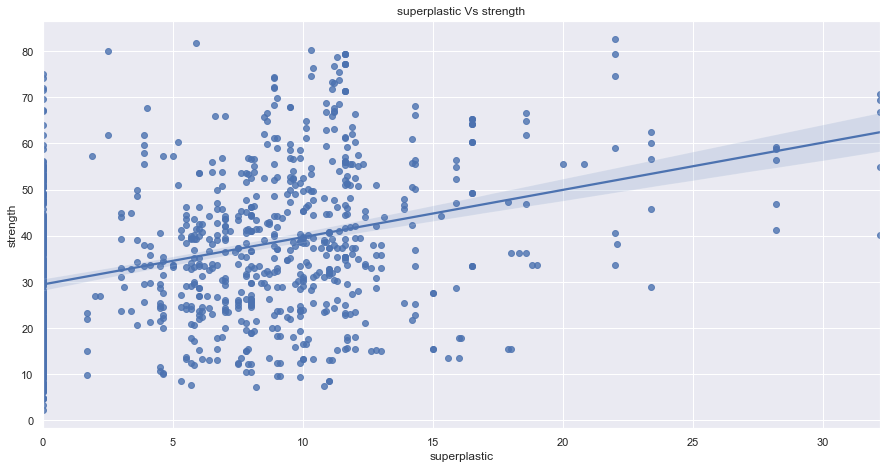

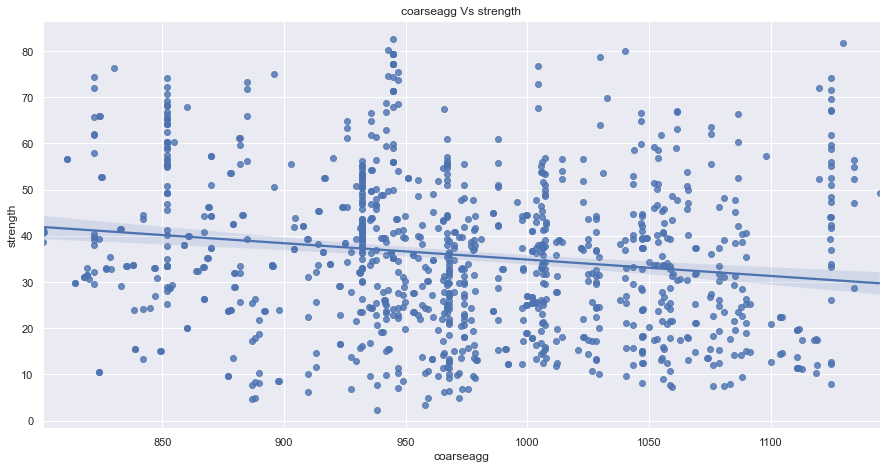

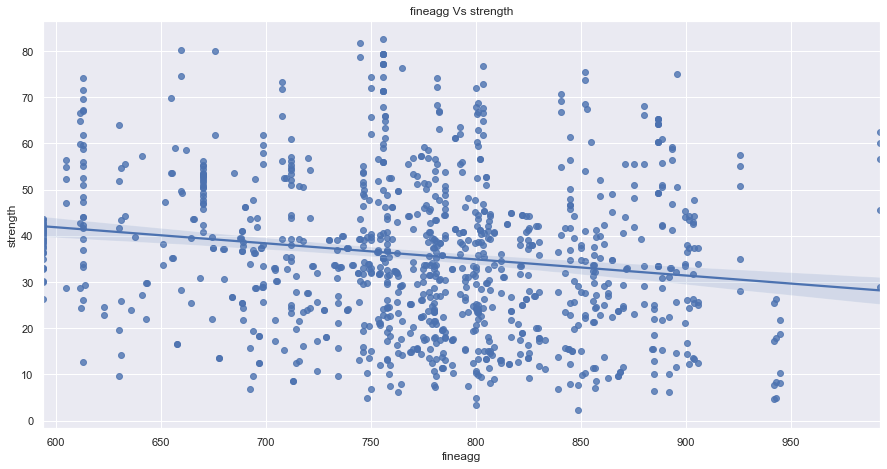

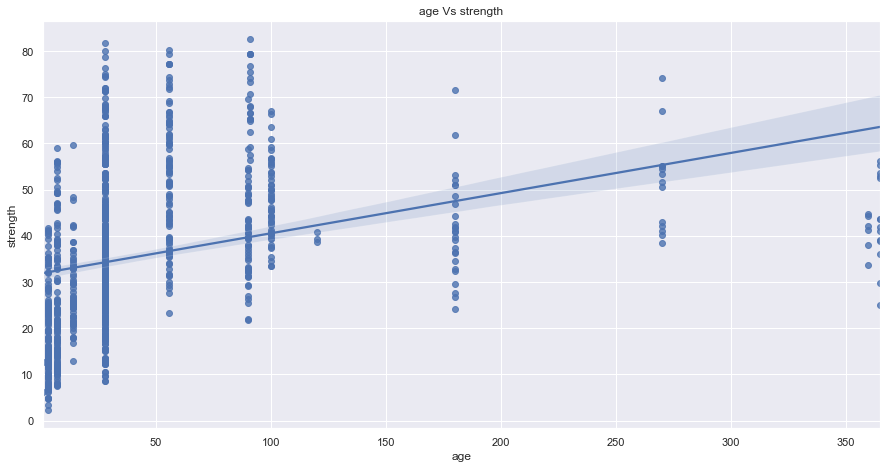

In [22]:
for col in list(data.columns)[:-1]:
    fig,ax1=plt.subplots(figsize=(15,7.5),ncols=1,sharex=False)
    sns.regplot(x=data[col],y=data['strength'],ax=ax1).set_title(f'{col} Vs strength')

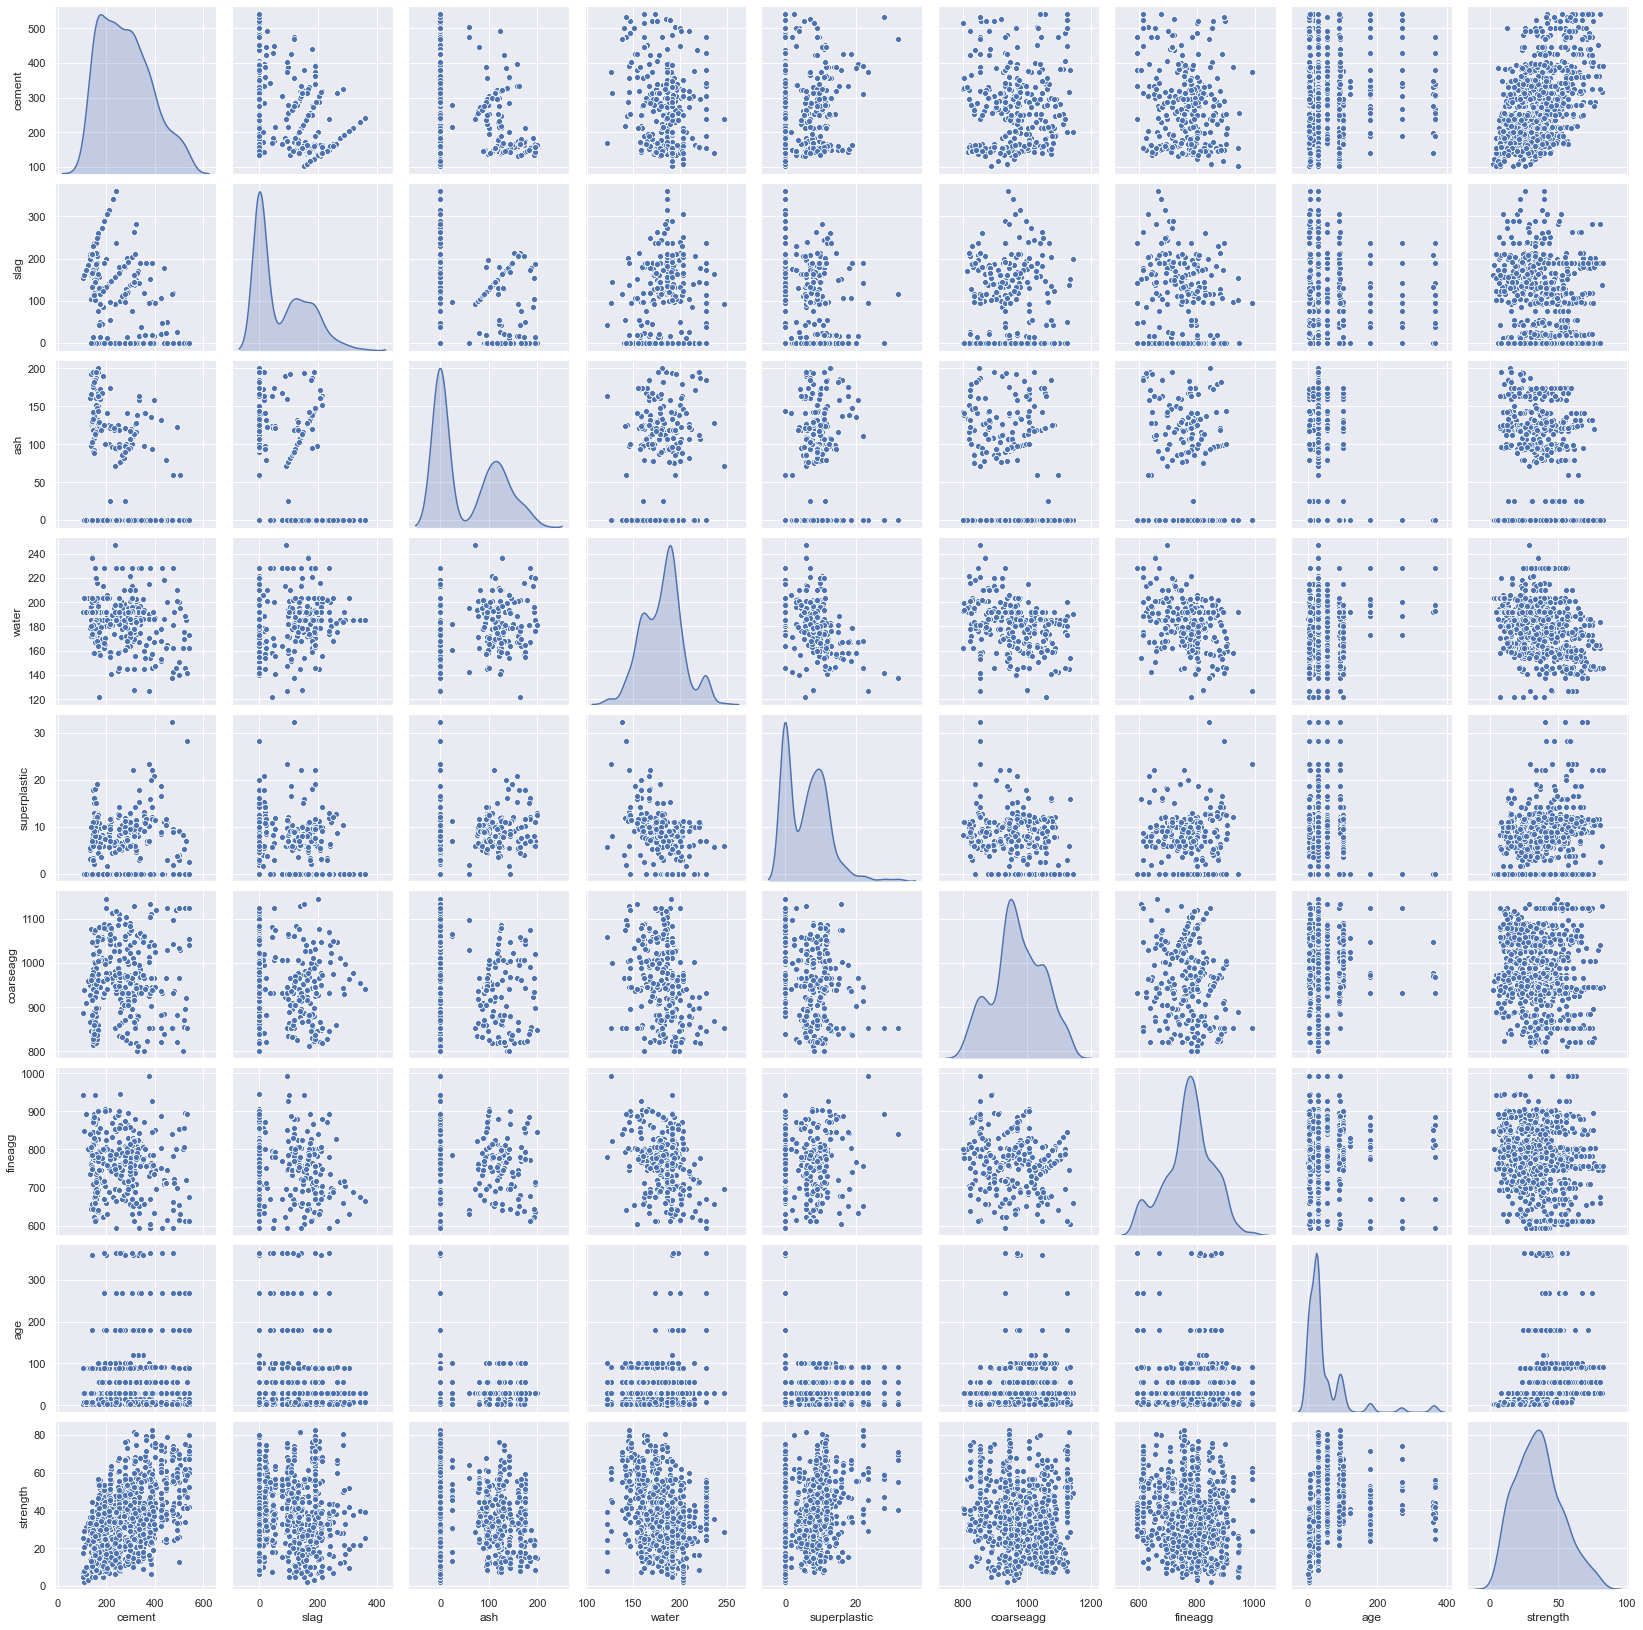

In [23]:
sns.pairplot(data,diag_kind='kde');

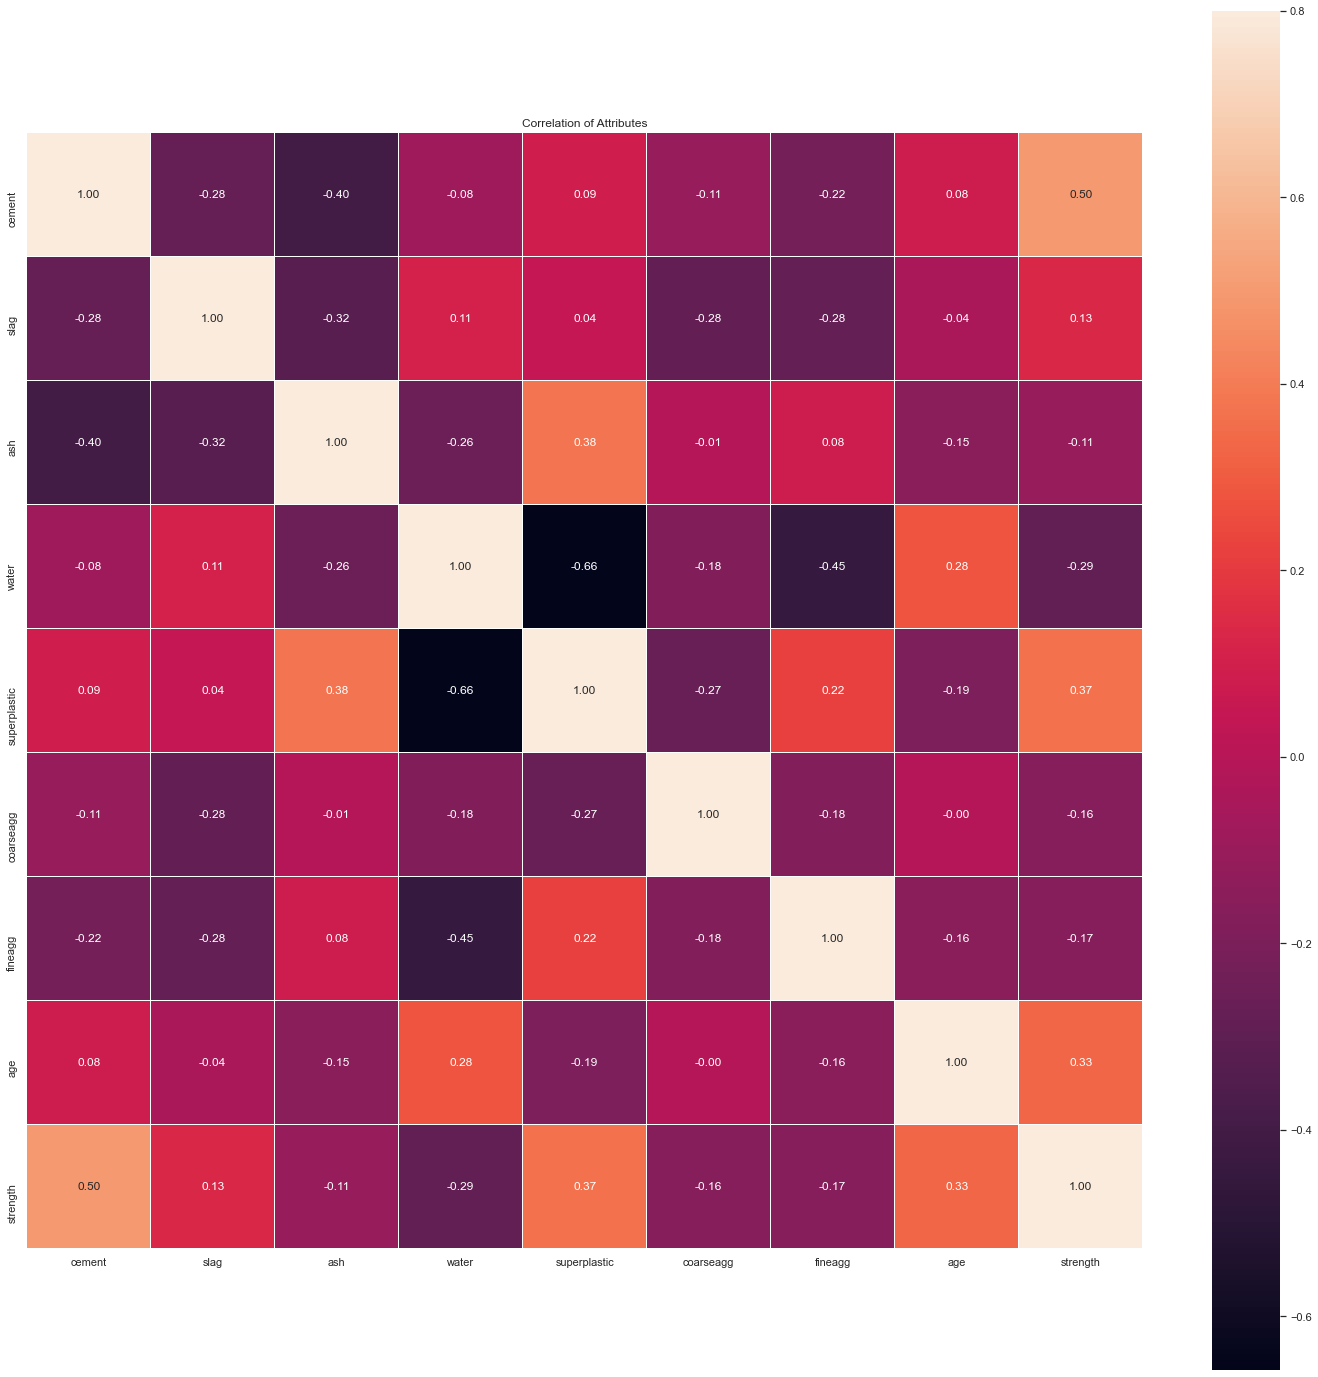

In [24]:
plt.figure(figsize=(25,25))
ax=sns.heatmap(data.corr(),vmax=.8,square=True,fmt='.2f',annot=True,linecolor='white',linewidths=0.01)
plt.title('Correlation of Attributes')
plt.show()

### Based on Pair Plot and Correlation Matrix we Understand that

- **Cement** does not have any significiant relationship with other **Independent attributes** But it is positively associated with the targest attribute **strength**, the relation is not very strong  

- **Slag** Does not have any significiant relation with any of the attributes

- **Ash** Does not have any significiant relation with any of the attributes

- **water** Has a **Negative Association** with **superplastic and fineagg** and there is no other significant relation with any other attributes
- **superplastic** has **Negative association** with **water** and **Positive Association with Ash and strength** buth this relation is not so strong 

- **courseagg** Does not have any significiant relation with any of the attributes

- **age** has a very slight **positive association** with **strength**

### Outlier Treatment

In [25]:
#creating the copy of orginal data set
data1=data.copy()

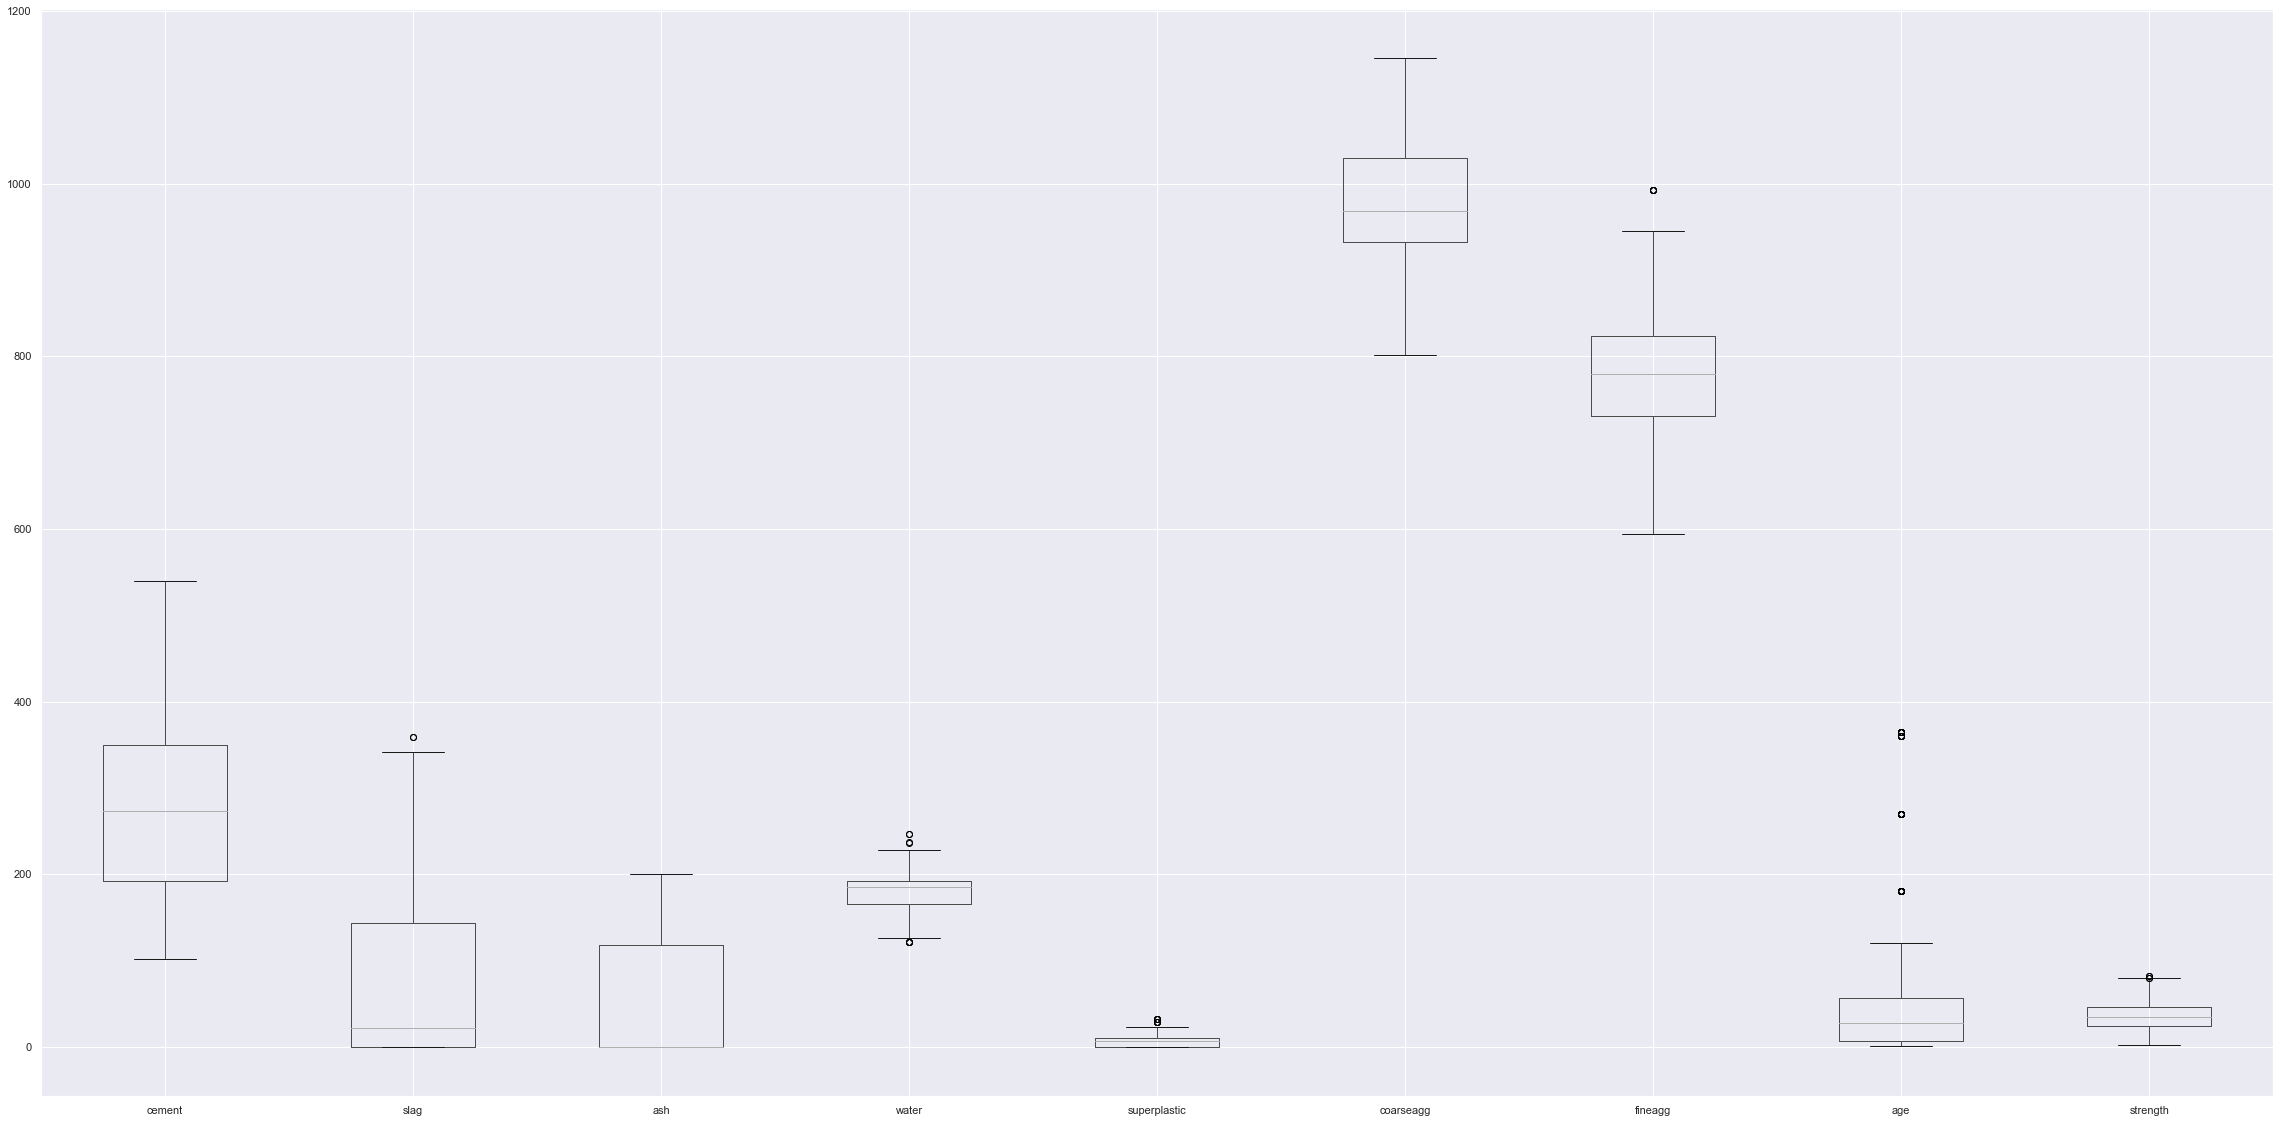

In [26]:
data1.boxplot(figsize=(40,20));

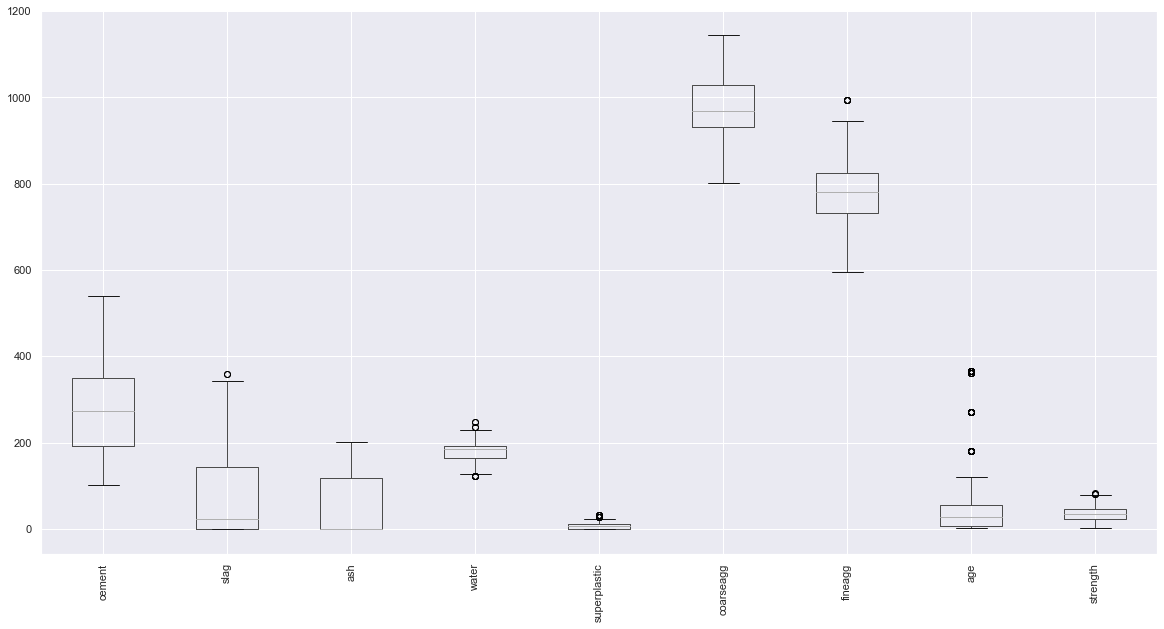

In [27]:
_, bp = data1.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [28]:
for idx, col in enumerate(data1.columns):
    print('Number of outliers in ',col, '-', len(fliers[idx]))

Number of outliers in  cement - 0
Number of outliers in  slag - 2
Number of outliers in  ash - 0
Number of outliers in  water - 9
Number of outliers in  superplastic - 10
Number of outliers in  coarseagg - 0
Number of outliers in  fineagg - 5
Number of outliers in  age - 59
Number of outliers in  strength - 4


In [29]:
for idx, col in enumerate(data1.columns):
    q1 = data1[col].quantile(0.25)
    q3 = data1[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)

    data1.loc[(data1[col] < low), col] = caps[idx * 2][0]
    data1.loc[(data1[col] > high), col] = caps[idx * 2 + 1][0]

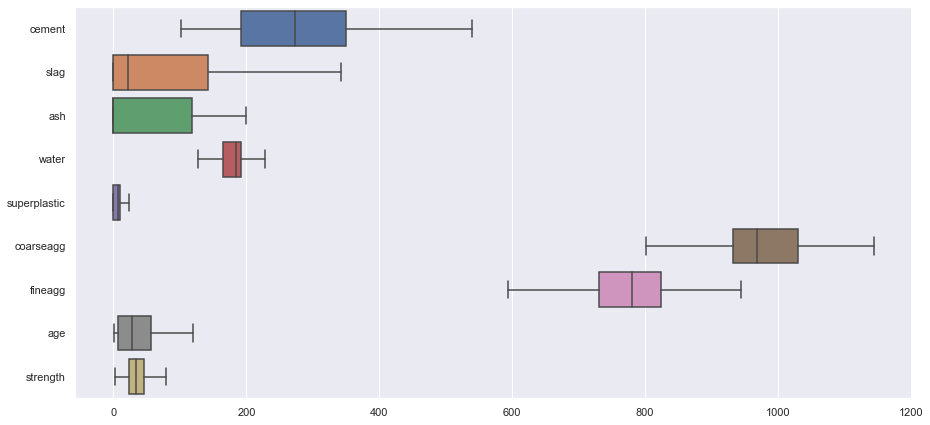

In [30]:
# Check the dataset after Outlier treatment
 # Check the dataset after Outlier treatment
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data1.iloc[:, 0:18], orient = 'h')

- All the outliers are treated 

## Feature Engineering

### Principal Component Analysis (PCA)

In [31]:
#Standardise the data
from scipy.stats import zscore
data_scaled=data1.apply(zscore)

In [32]:
data_scaled

cement      slag       ash     water  superplastic  coarseagg  \
0    -1.339017  1.603837 -0.847144  1.038806     -1.070393  -0.014398   
1    -1.074790 -0.367612  1.096078 -1.099025      0.812800   1.388141   
2    -0.298384 -0.857572  0.648965  0.277322     -0.111360  -0.206121   
3    -0.145209  0.466016 -0.847144  2.197586     -1.070393  -0.526517   
4    -1.209776  1.271779 -0.847144  0.556375      0.516371   0.958372   
...        ...       ...       ...       ...           ...        ...   
1025 -1.399330 -0.857572  1.747988 -0.072677      0.673304  -0.153365   
1026  2.394626 -0.857572 -0.847144 -1.879428      3.009858  -1.554617   
1027 -0.045645  0.489237  0.564545 -0.091596      0.481497  -1.323005   
1028  0.582373 -0.416376 -0.847144  2.197586     -1.070393  -0.526517   
1029  2.477915 -0.857572 -0.847144 -0.403757     -1.070393   1.956877   

       fineagg       age  strength  
0    -0.312289 -0.276792 -0.354999  
1     0.287169 -0.683574 -0.737503  
2     1.104041 -0.276792 -0.395168  
3    -1.298819 -0.276792  0.601862  
4    -0.963273 -0.276792 -1.050462  
...        ...       ...       ...  
1025  0.397761 -0.276792 -1.350230  
1026  1.512477 -1.003188  0.329072  
1027 -0.063457 -0.276792  0.507734  
1028 -1.298819  2.396346  1.154035  
1029 -2.015153 -0.886965  1.007148  

[1030 rows x 9 columns]

In [33]:
#Creating a Covariance Matrix

cov_matrix=np.cov(data_scaled.T)
print('Covariance Matrix \n%s',cov_matrix)

Covariance Matrix 
%s [[ 1.00097182 -0.27567318 -0.39785361 -0.08179919  0.07313521 -0.10945526
  -0.22712896  0.04880104  0.49851342]
 [-0.27567318  1.00097182 -0.32396947  0.10681438  0.04530973 -0.28447347
  -0.28437099 -0.05201993  0.134922  ]
 [-0.39785361 -0.32396947  1.00097182 -0.25918954  0.40318139 -0.00997051
   0.08221025 -0.08302168 -0.10562992]
 [-0.08179919  0.10681438 -0.25918954  1.00097182 -0.6686933  -0.17920813
  -0.44805761  0.17630894 -0.29238688]
 [ 0.07313521  0.04530973  0.40318139 -0.6686933   1.00097182 -0.25930063
   0.21257046 -0.11224322  0.36634444]
 [-0.10945526 -0.28447347 -0.00997051 -0.17920813 -0.25930063  1.00097182
  -0.17540462  0.01295939 -0.1654945 ]
 [-0.22712896 -0.28437099  0.08221025 -0.44805761  0.21257046 -0.17540462
   1.00097182 -0.08726267 -0.17119166]
 [ 0.04880104 -0.05201993 -0.08302168  0.17630894 -0.11224322  0.01295939
  -0.08726267  1.00097182  0.48084423]
 [ 0.49851342  0.134922   -0.10562992 -0.29238688  0.36634444 -0.1654945
 

In [34]:
#Calculate Eigen Values & Eigen Vectors
e_vals,e_vecs=np.linalg.eig(cov_matrix)
print('Eigen Values \n%s' %e_vals)
print('\nEigen Vectors \n%s'%e_vecs)

Eigen Values 
[2.23526821 1.97557419 0.02866252 0.11646618 0.22478059 1.41255364
 0.89180319 1.11377886 1.00985897]

Eigen Vectors 
[[-0.01001461  0.50873888  0.48150913 -0.30485598  0.04165939 -0.32609802
  -0.31424447  0.45766615  0.00359583]
 [-0.16974728  0.14173165  0.45305068 -0.20392733 -0.08653888  0.69428825
   0.33769052 -0.04178465  0.31456436]
 [ 0.37222303 -0.27982934  0.38031908 -0.17492266 -0.3298988  -0.02234756
  -0.4796712  -0.513255    0.07111424]
 [-0.57648036 -0.06416759  0.35360609  0.54268862  0.18108156  0.097407
  -0.3480443  -0.13591935 -0.24923311]
 [ 0.56498725  0.17568681  0.06235528  0.29730469  0.68130224  0.21736901
  -0.1273612  -0.04639141  0.16688387]
 [-0.07347676 -0.19387555  0.33259397  0.2271219   0.09751799 -0.5641748
   0.40555695 -0.12134447  0.53647595]
 [ 0.36816662 -0.2230147   0.41234402  0.1843876  -0.12192342 -0.00631552
   0.41303628  0.23991706 -0.60632254]
 [-0.11499654  0.3409747   0.04775779 -0.33957781  0.31504764 -0.18789224
   0.2

In [35]:
# the "cumulative variance explained" analysis 
tot=sum(e_vals)
var_exp=[(i/tot)*100 for i in sorted(e_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

Cumulative Variance Explained [ 24.81220049  46.74171331  62.4215159   74.78482173  85.99458307
  95.89388707  98.38902436  99.6818367  100.        ]


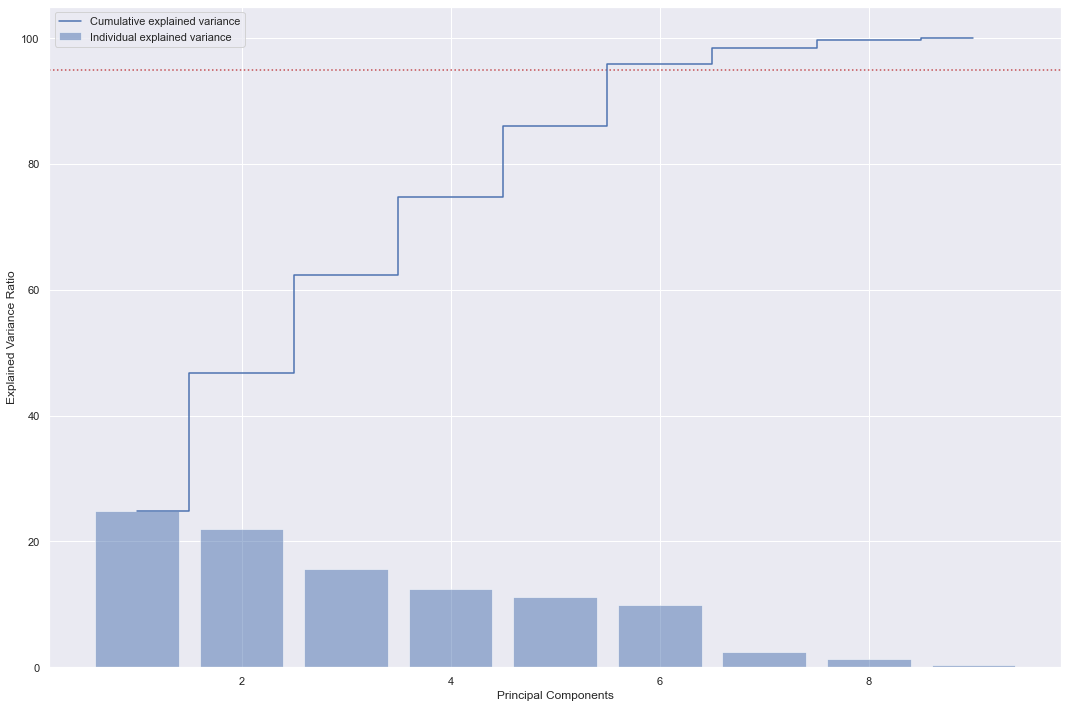

In [36]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(15,10))
plt.axhline(y=95, color='r', linestyle=':')
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Observations:
- The above plot shows that, post PCA, employing 5 principal components we are able to explain more than 95% of the variance in the dataset.


In [37]:
# Create a new matrix using the n components
pca=PCA(n_components=6).fit_transform(data_scaled)


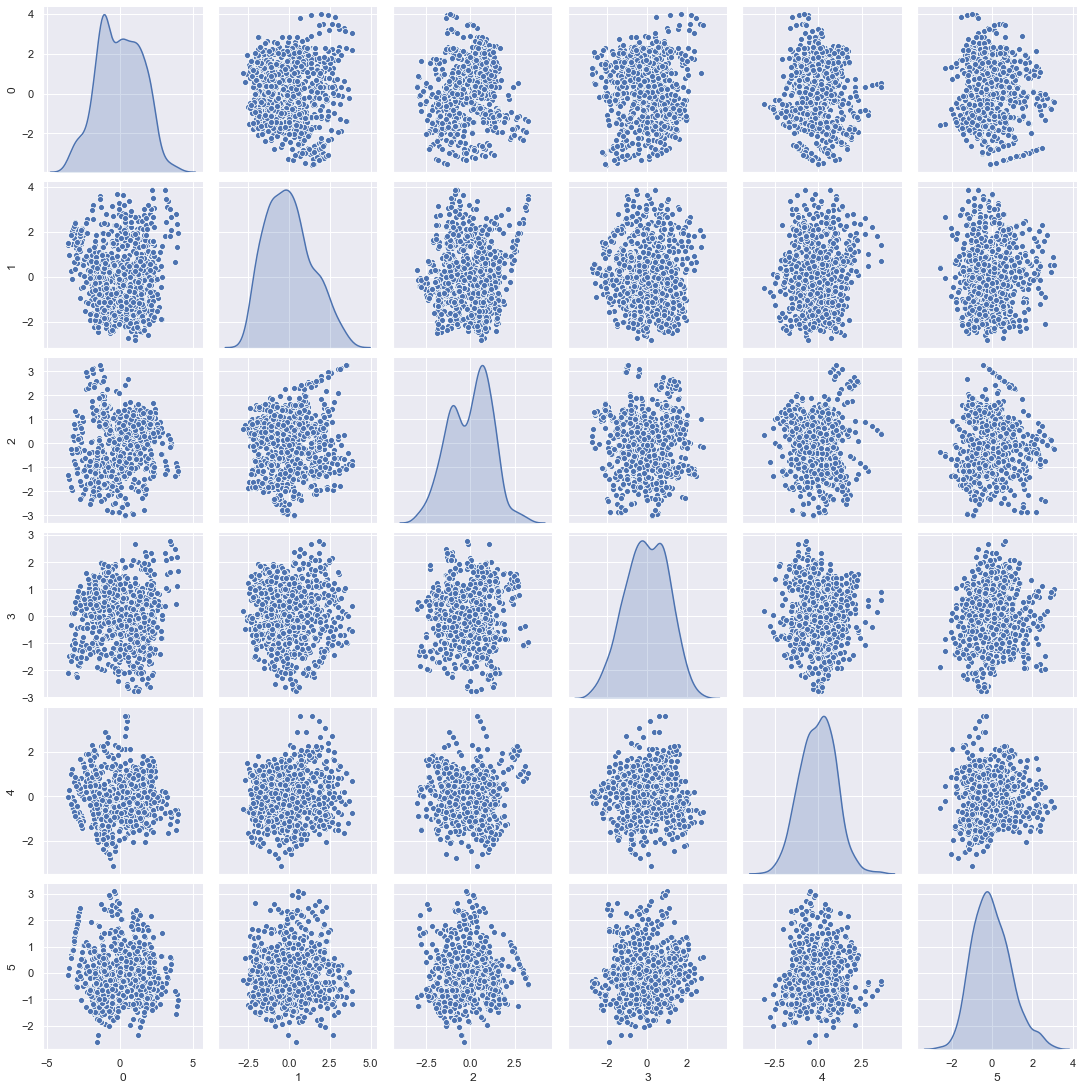

In [38]:
#Converting PCA Transformed data from Array to Dataframe to visualise in the pairplot
pca_df=pd.DataFrame(pca)
sns.pairplot(pca_df,diag_kind='kde')

#### Observation

- From above graphs we found that all the data points are in a cloud distribution
- There is no Relation between any components
- We have to drop 3 Features from the dataset for getting 95% Variance 
- We will **drop attributes instead of PCA**

### Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

In [39]:
X=data_scaled.drop(['strength'],axis=1)
y=data_scaled.strength
X.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.603837 -0.847144  1.038806     -1.070393  -0.014398 -0.312289   
1 -1.074790 -0.367612  1.096078 -1.099025      0.812800   1.388141  0.287169   
2 -0.298384 -0.857572  0.648965  0.277322     -0.111360  -0.206121  1.104041   
3 -0.145209  0.466016 -0.847144  2.197586     -1.070393  -0.526517 -1.298819   
4 -1.209776  1.271779 -0.847144  0.556375      0.516371   0.958372 -0.963273   

        age  
0 -0.276792  
1 -0.683574  
2 -0.276792  
3 -0.276792  
4 -0.276792

#### Splitting of values

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [41]:
print("Shape of Training Data :",X_train.shape)
print("Shape of Testing Data :",X_test.shape)

Shape of Training Data : (721, 8)
Shape of Testing Data : (309, 8)


#### Linear Regression

In [42]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_trainscore=lr_model.score(X_train,y_train)
lr_testscore=lr_model.score(X_test,y_test)

In [43]:
#coefficients 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr_model.coef_[idx]))

The coefficient for cement is 0.7584917548601813
The coefficient for slag is 0.5241006389242318
The coefficient for ash is 0.3098468697528367
The coefficient for water is -0.1817225803453452
The coefficient for superplastic is 0.11167490736424873
The coefficient for coarseagg is 0.06882315251500634
The coefficient for fineagg is 0.10559893643279736
The coefficient for age is 0.5505055343511238


- From above we found that Superplastic & coarseagg has very weak co-efficients


#### Regularizing the model

#### - Ridge Model

In [44]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
ridge_trainscore=ridge.score(X_train,y_train)
ridge_testscore=ridge.score(X_test,y_test)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.75396061  0.51968804  0.30589086 -0.1846488   0.11175905  0.06585629
  0.10177101  0.55012074]


#### Lasso Model

In [45]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_trainscore=lasso.score(X_train,y_train)
lasso_testscore=lasso.score(X_test,y_test)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.40537318  0.16156057  0.         -0.12698781  0.19074579 -0.
 -0.          0.40136114]


- We found that the coefficients of **ash,coarseagg & fineagg is 0** in Lasso Model ,So we can **drop these features** 

In [46]:
score={'Train Score' : {'Regression' : lr_trainscore,
                        'Ridge':ridge_trainscore,
                        'Lasso':lasso_trainscore},
      'Test Score':{'Regression' : lr_testscore,
                        'Ridge':ridge_testscore,
                        'Lasso':lasso_testscore}}
score_df=pd.DataFrame(score)
score_df

Train Score  Test Score
Regression     0.734879    0.738512
Ridge          0.734876    0.738682
Lasso          0.656046    0.650420

In [325]:
results = pd.DataFrame({'Method':['Regression'], 'Train Accuracy': lr_trainscore,'Test Accuracy':lr_testscore},index={'1'})
tempresultsdf=pd.DataFrame({'Method':['Ridge'], 'Train Accuracy': ridge_trainscore,'Test Accuracy':ridge_testscore},index={'2'})
results=pd.concat([results,tempresultsdf])
tempresultsdf=pd.DataFrame({'Method':['Lasso'], 'Train Accuracy': lasso_trainscore,'Test Accuracy':lasso_testscore},index={'3'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results


Method  Train Accuracy  Test Accuracy
1  Regression        0.734879       0.738512
2       Ridge        0.734876       0.738682
3       Lasso        0.656046       0.650420

- The accuray scores of Regression and Ridge model is almost the same in Train and test sets and the performance is  better compard to Lasso but lasso have acheived the model score by using 3 less features

### Checking weather the model complexity increases the model performance or not 

In [48]:
poly=PolynomialFeatures(degree = 2, interaction_only=True)#quadratic with degree 2
X_poly=poly.fit_transform(X)
Xpoly_train,Xpoly_test,ypoly_train,ypoly_test=train_test_split(X_poly,y,test_size=.30,random_state=1)



In [49]:
Xpoly_train.shape

(721, 37)

In [50]:
lr_model.fit(Xpoly_train,ypoly_train)
print(lr_model.coef_)

[ 5.02544965e-18  7.78268311e-01  5.82866578e-01  2.83711534e-01
 -1.54014067e-01  1.73032754e-01  6.45550769e-02  1.18249307e-01
  6.17939938e-01  5.05390466e-02  7.78386978e-02 -1.71701293e-01
 -1.29899818e-01  2.98435390e-02  4.66417030e-02  1.05544622e-01
  1.02707455e-01 -4.61125408e-02 -4.55809917e-03  3.44137169e-02
  1.27722102e-01  1.96149033e-01 -6.74487664e-02 -1.36880799e-01
  2.63165164e-02  1.21301652e-01  1.58395492e-01  1.00400019e-01
 -5.23705831e-02 -1.17862133e-03 -1.84088254e-02  6.17010077e-02
  2.98334161e-02 -6.76628921e-03  1.00058077e-01  1.53909332e-02
  5.93020528e-02]


In [51]:
#Train accuracy score
lr_model.score(Xpoly_train,ypoly_train)

0.8044841143233414

In [52]:
#Test accuracy score
lr_model.score(Xpoly_test,ypoly_test)

0.7747562757353341

In [53]:
ridge.fit(Xpoly_train,ypoly_train)#ridge model
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.          0.77115733  0.57509217  0.27757773 -0.1590232   0.17290327
  0.05995112  0.11201165  0.61771285  0.04958149  0.07747198 -0.16948008
 -0.12754684  0.03010105  0.0464961   0.10280458  0.10121101 -0.04507289
 -0.00284898  0.03366509  0.12696361  0.19394823 -0.0653725  -0.1357679
  0.02622534  0.12111767  0.15584753  0.1015438  -0.05137528 -0.00077962
 -0.01966521  0.06251973  0.0310964  -0.00618412  0.10008236  0.01471412
  0.05729425]


In [54]:
lasso.fit(Xpoly_train,ypoly_train)#lasso model
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.39652348  0.15170902  0.         -0.12078103  0.17961075
 -0.         -0.          0.39947473  0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.04090343
 -0.          0.          0.          0.         -0.          0.
 -0.          0.          0.          0.          0.          0.
  0.        ]


In [55]:
print("Ridge Scores: ")
print("train score : ", ridge.score(Xpoly_train,ypoly_train))
print("test score : ", ridge.score(Xpoly_test,ypoly_test))
print()
print("Lasso Scores:")
print("train score : ", lasso.score(Xpoly_train,ypoly_train))
print("test score : ", lasso.score(Xpoly_test,ypoly_test))

Ridge Scores: 
train score :  0.804477994525461
test score :  0.7747084063148023

Lasso Scores:
train score :  0.657424361870979
test score :  0.6470046309081134


#### Observations
- The model Performance is slightly increased
- Quadratic model will be better than a simple linear model
- The low score may be due to the mix of gaussians , 

### Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength




#### K Means Clustering

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

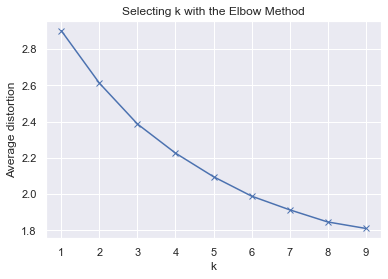

In [58]:
### Finding Optimal no of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])
                          
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [59]:
#Lets try with 3 groups
kmeans_model=KMeans(3)
kmeans_model.fit(data_scaled)
prediction=kmeans_model.predict(data_scaled)
kmeans_df=data_scaled.copy()#creating copy
kmeans_df["Group"]=prediction
kmeans_df.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.603837 -0.847144  1.038806     -1.070393  -0.014398 -0.312289   
1 -1.074790 -0.367612  1.096078 -1.099025      0.812800   1.388141  0.287169   
2 -0.298384 -0.857572  0.648965  0.277322     -0.111360  -0.206121  1.104041   
3 -0.145209  0.466016 -0.847144  2.197586     -1.070393  -0.526517 -1.298819   
4 -1.209776  1.271779 -0.847144  0.556375      0.516371   0.958372 -0.963273   

        age  strength  Group  
0 -0.276792 -0.354999      2  
1 -0.683574 -0.737503      0  
2 -0.276792 -0.395168      0  
3 -0.276792  0.601862      2  
4 -0.276792 -1.050462      2

In [60]:
clusters = kmeans_df.groupby(["Group"])
clusters.mean()

cement      slag       ash     water  superplastic  coarseagg  \
Group                                                                    
0     -0.625186 -0.417885  1.135717 -0.292646      0.443136   0.103508   
1      0.958448  0.488087 -0.405972 -0.866947      1.025055  -0.661010   
2      0.062121  0.119575 -0.795950  0.702171     -0.916055   0.246719   

        fineagg       age  strength  
Group                                
0      0.237376 -0.070343 -0.242659  
1      0.107663 -0.127155  1.121341  
2     -0.264858  0.127219 -0.359267

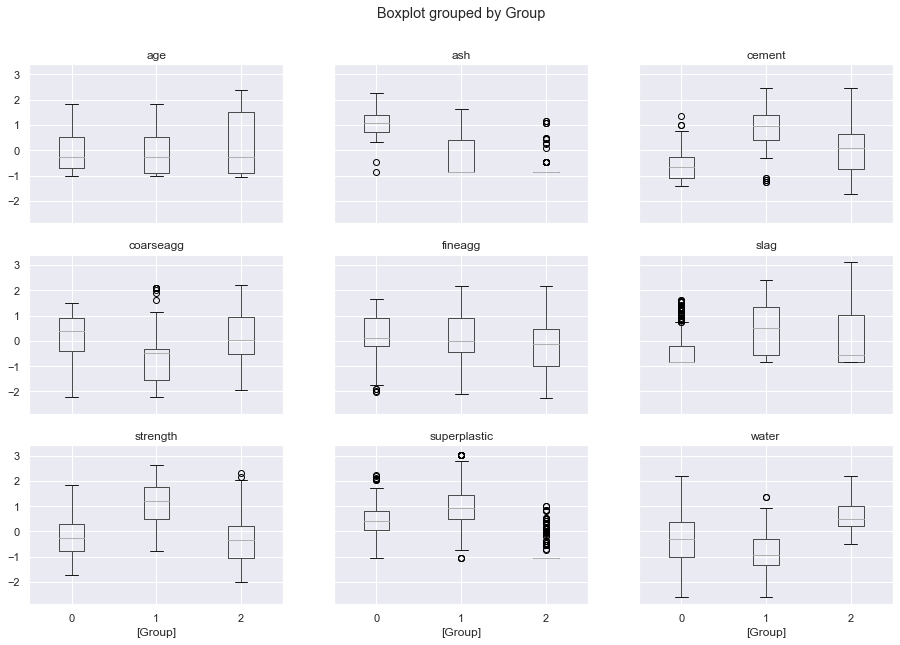

In [61]:
kmeans_df.boxplot(by='Group',layout=(3,3),figsize=(15,10));


### Let us analyze the Strength column vs other columns group wise.

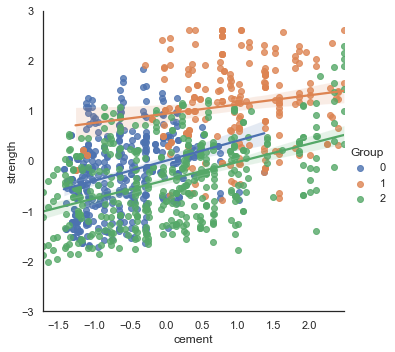

In [62]:
#cement vs strength
with sns.axes_style("white"):
    plot=sns.lmplot('cement','strength',data=kmeans_df,hue='Group')
    plot.set(ylim=(-3,3))

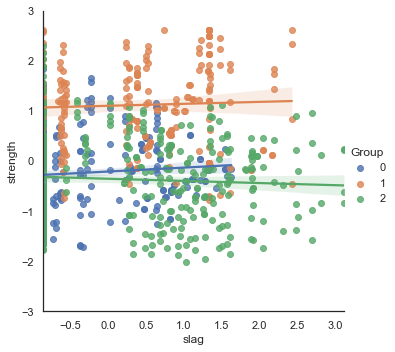

In [63]:
#slag vs cement
with sns.axes_style("white"):
    plot=sns.lmplot('slag','strength',data=kmeans_df,hue='Group')
    plot.set(ylim=(-3,3))

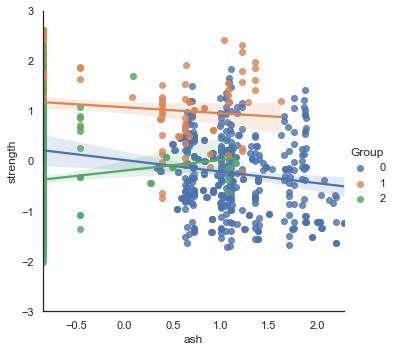

In [64]:
#ash vs strength
with sns.axes_style("white"):
    plot=sns.lmplot('ash','strength',data=kmeans_df,hue='Group')
    plot.set(ylim=(-3,3))

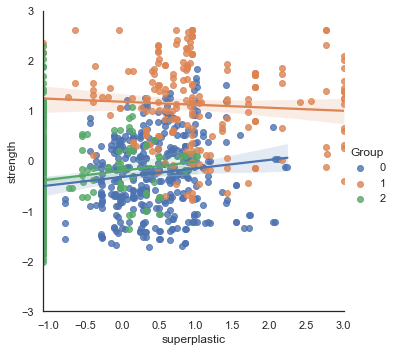

In [65]:
#superplastic vs strength
with sns.axes_style("white"):
    plot=sns.lmplot('superplastic','strength',data=kmeans_df,hue='Group')
    plot.set(ylim=(-3,3))

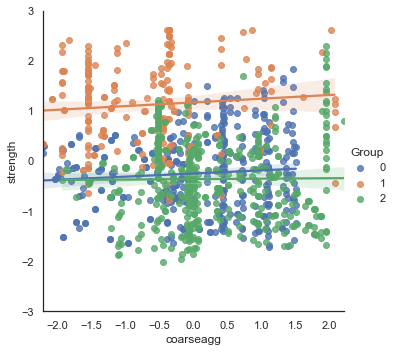

In [66]:
#coarseagg vs strength
with sns.axes_style("white"):
     plot=sns.lmplot('coarseagg','strength',data=kmeans_df,hue='Group')
     plot.set(ylim=(-3,3))

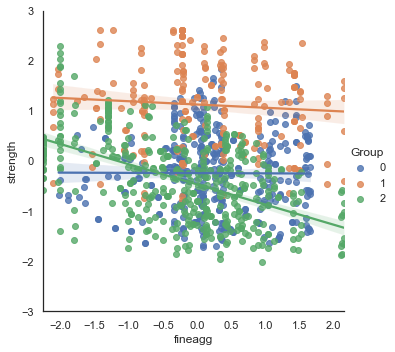

In [67]:
#fineagg vs strength
with sns.axes_style("white"):
     plot=sns.lmplot('fineagg','strength',data=kmeans_df,hue='Group')
     plot.set(ylim=(-3,3))

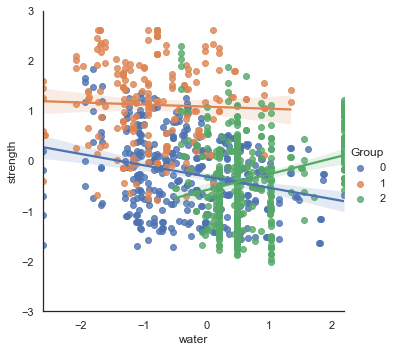

In [68]:
#water vs strength
with sns.axes_style("white"):
     plot=sns.lmplot('water','strength',data=kmeans_df,hue='Group')
     plot.set(ylim=(-3,3))

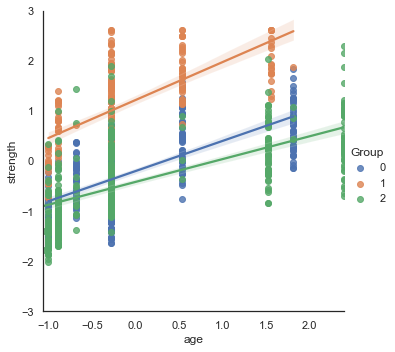

In [69]:
#age vs strength
with sns.axes_style("white"):
     plot=sns.lmplot('age','strength',data=kmeans_df,hue='Group')
     plot.set(ylim=(-3,3))

#### Observations from Boxplot and lm plot

- The groups are **overlapping** with eachother
- It is difficult to distinguish the clusters clearly, So it is **difficult to pull out a cluster and build a model**
- Hence K-means also does not seem to help our cause
- **ash, coarseagg and fineagg** are week contributors




### Decision Tree

In [73]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

##### Feature Importance plot using Decision Tree Regressor

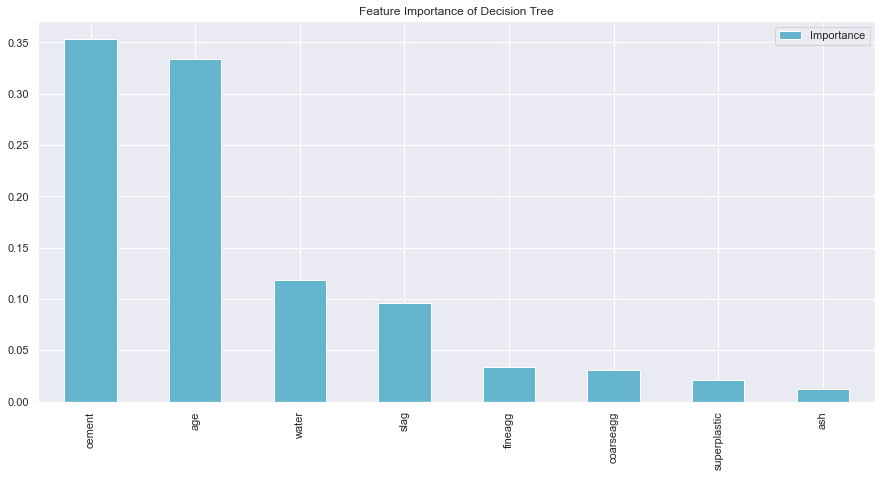

In [130]:
pd.DataFrame(dt.feature_importances_, index = data_scaled.columns[:-1], 
             columns=['Importance']).sort_values('Importance',ascending=False).plot(kind='bar',color='c', figsize=(15,7), title='Feature Importance of Decision Tree')

- **cement,age,water and slag** are important attributes
- **coarseagg,fineagg,superplastic and ash** are less important so they will not contribute much to the strength
- we found that **coarseagg,fineagg & ash** are weak contributors from the correlation map as well as the feature importance in decision tree, Hence we will **Drop these columns**

In [75]:
#creating copy of the dataset
data_dt=data_scaled.copy()

In [76]:
X=data_dt.drop(['strength','ash','fineagg','coarseagg'],axis=1)
y=data_dt['strength']

# Spliting X&y into training and testing set in the ratio 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [77]:
dt2=DecisionTreeRegressor()
dt2.fit(X_train,y_train)

DecisionTreeRegressor()

In [78]:
y_pred=dt2.predict(X_test)
dt_trainacc=dt2.score(X_train,y_train)
dt_testacc=dt2.score(X_test,y_test)
print('Training Accuracy (DT) : ' ,dt_trainacc)
print('Testing Accuract (DT): ',dt_testacc )


Training Accuracy (DT) :  0.994250323773731
Testing Accuract (DT):  0.8354540744656248


- The model is **overfitting** as the accuracy in train data is 99% and in test it is only 85%

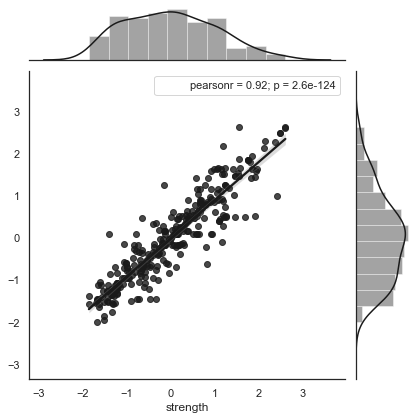

In [79]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [326]:
tempresultsdf=pd.DataFrame({'Method':['Decision Tree'], 'Train Accuracy': dt_trainacc,'Test Accuracy':dt_testacc},index={'4'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1     Regression        0.734879       0.738512
2          Ridge        0.734876       0.738682
3          Lasso        0.656046       0.650420
4  Decision Tree        0.994250       0.835454

#### Hyperparameter Tuning with Grid SearchCV

In [111]:
param_grid = {'max_depth': np.arange(3, 6),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100, 105, 90, 95],
             'min_samples_split': [6, 7, 8, 9, 10],
             'max_features':[2, 3, 4, 5, 6]}
grid_tree_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10, scoring= 'r2')
grid_tree_dt.fit(X_train, y_train)
print(grid_tree_dt.best_estimator_)
print('Best Score:', np.abs(grid_tree_dt.best_score_))

DecisionTreeRegressor(max_depth=5, max_features=4, max_leaf_nodes=105,
                      min_samples_split=6)
Best Score: 0.7347805390536392


In [114]:
# invoking the decision tree classifier function#criterion = 'mse'

dt3 = DecisionTreeRegressor(criterion = 'mae',max_depth=5,min_samples_split=6,max_leaf_nodes=105,max_features=4)
dt3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=4,
                      max_leaf_nodes=105, min_samples_split=6)

In [119]:
y_preddt=dt3.predict(X_test)
dt3_trainacc=dt3.score(X_train,y_train)
dt3_testacc=dt3.score(X_test,y_test)
print('Training Accuracy (DT Hyperparameter tuning) : ' ,dt3_trainacc)
print('Testing Accuracy (DT yperparameter tuning): ',dt3_testacc )



Training Accuracy (DT Hyperparameter tuning) :  0.7756820725563555
Testing Accuracy (DT yperparameter tuning):  0.7203799432248212


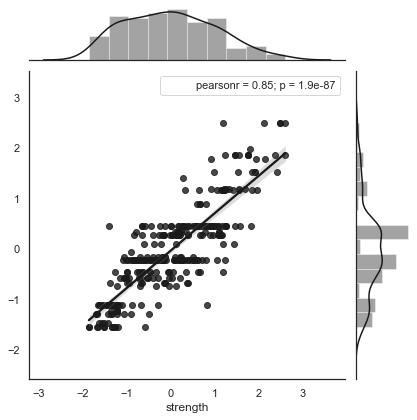

In [120]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_preddt, stat_func=pearsonr,kind="reg", color="k");

In [327]:
tempresultsdf=pd.DataFrame({'Method':['Decision Tree with Hypeparameter Tuning'], 'Train Accuracy': dt3_trainacc,'Test Accuracy':dt3_testacc},index={'5'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                               Regression        0.734879       0.738512
2                                    Ridge        0.734876       0.738682
3                                    Lasso        0.656046       0.650420
4                            Decision Tree        0.994250       0.835454
5  Decision Tree with Hypeparameter Tuning        0.775682       0.720380

- By **Hyper Parameter tuning** the **over fitting is reduced**  but ith has brought down model performance as well

### Random Forest Regressor

In [132]:
#creating copy of the dataset
data_rf=data_scaled.copy()

In [142]:

X=data_rf.drop(['strength'],axis=1)
y=data_rf['strength']

# Spliting X&y into training and testing set in the ratio 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

##### Feature Importance plot using Random Forest Classifier

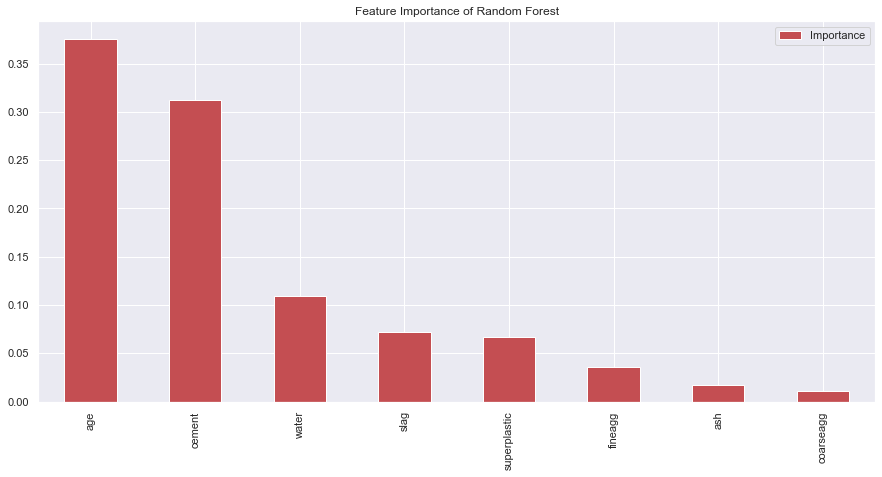

In [313]:
pd.DataFrame(rf.feature_importances_, index = data_rf.columns[:-1], 
             columns=['Importance']).sort_values('Importance',ascending=False).plot(kind='bar',color='r', figsize=(15,7), title='Feature Importance of Random Forest')

- **cement,age** are important attributes
- **coarseagg,fineagg,superplastic and ash** are less important so they will not contribute much to the strength
- we found that **coarseagg,fineagg & ash** are weak contributors from the correlation map as well as the feature importance in decision tree, Hence we will **Drop these columns**

#### Dropping of ash, fineagg and coarseagg attributes

In [244]:
X=data_rf.drop(['strength','ash','fineagg','coarseagg'],axis=1)
y=data_rf['strength']

# Spliting X&y into training and testing set in the ratio 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [245]:
rf2=RandomForestRegressor()
rf2.fit(X_train,y_train)

RandomForestRegressor()

In [246]:
y_pred=rf2.predict(X_test)
rf_trainacc=rf2.score(X_train,y_train)
rf_testacc=rf2.score(X_test,y_test)
print('Training Accuracy (RF) : ' ,rf_trainacc)
print('Testing Accuract (RF): ',rf_testacc )


Training Accuracy (RF) :  0.981858425406705
Testing Accuract (RF):  0.906828693418344


- The model is **overfitting** as the accuracy in train data is approximately 98% and in test it is only 91%

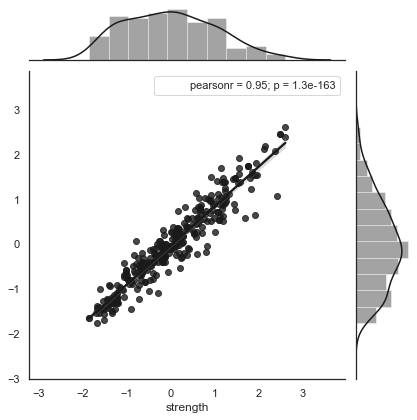

In [149]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [328]:
tempresultsdf=pd.DataFrame({'Method':['Random Forest'], 'Train Accuracy': rf_trainacc,'Test Accuracy':rf_testacc},index={'6'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                               Regression        0.734879       0.738512
2                                    Ridge        0.734876       0.738682
3                                    Lasso        0.656046       0.650420
4                            Decision Tree        0.994250       0.835454
5  Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                            Random Forest        0.981858       0.906829

#### Hyperparameter Tuning with Grid SearchCV

In [173]:
param_grid = {'max_depth': np.arange(3, 8),
             'criterion' : ['mse','mae'],
             'max_leaf_nodes': [100, 105, 90, 95],
             'min_samples_split': [6, 7, 8, 9, 10],
             'max_features':['auto','sqrt','log2']}

grid_tree_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5, scoring= 'r2')
grid_tree_rf.fit(X_train, y_train)
print(grid_tree_rf.best_estimator_)
print('Best Score:', np.abs(grid_tree_rf.best_score_))

RandomForestRegressor(max_depth=7, max_leaf_nodes=90, min_samples_split=6)
Best Score: 0.8634183175435434


In [186]:
# invoking the decision tree classifier function#criterion = 'mse'

rf3 = RandomForestRegressor(criterion = 'mse',max_leaf_nodes=90,max_depth=7,min_samples_split=6,)
rf3.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_leaf_nodes=90, min_samples_split=6)

In [247]:
y_predrf=rf3.predict(X_test)
rf3_trainacc=rf3.score(X_train,y_train)
rf3_testacc=rf3.score(X_test,y_test)
print('Training Accuracy (RF Hyperparameter tuning) : ' ,rf3_trainacc)
print('Testing Accuracy (RF yperparameter tuning): ',rf3_testacc )



Training Accuracy (RF Hyperparameter tuning) :  0.9412439336100229
Testing Accuracy (RF yperparameter tuning):  0.880184289576261


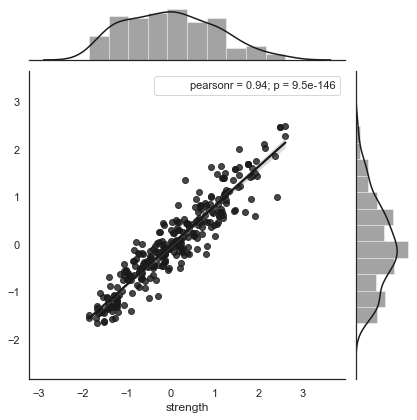

In [192]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_predrf, stat_func=pearsonr,kind="reg", color="k");

In [329]:
tempresultsdf=pd.DataFrame({'Method':['Random Forest with Hypeparameter Tuning'], 'Train Accuracy': rf3_trainacc,'Test Accuracy':rf3_testacc},index={'7'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                               Regression        0.734879       0.738512
2                                    Ridge        0.734876       0.738682
3                                    Lasso        0.656046       0.650420
4                            Decision Tree        0.994250       0.835454
5  Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                            Random Forest        0.981858       0.906829
7  Random Forest with Hypeparameter Tuning        0.941244       0.880184

### Gradient Boosting Regressor

In [201]:
#creating copy of the dataset
data_gb=data_scaled.copy()

In [204]:

X=data_gb.drop(['strength'],axis=1)
y=data_gb['strength']

# Spliting X&y into training and testing set in the ratio 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

##### Feature Importance plot using Gradient Boost Regressor

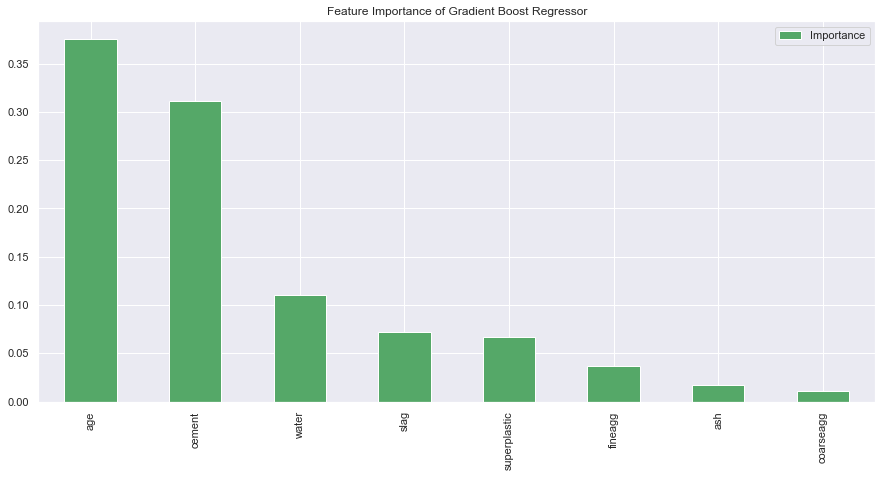

In [314]:
pd.DataFrame(gb.feature_importances_, index = data_gb.columns[:-1], 
             columns=['Importance']).sort_values('Importance',ascending=False).plot(kind='bar',color='g', figsize=(15,7), title='Feature Importance of Gradient Boost Regressor')

- **cement,age** are important attributes
- **coarseagg,fineagg,superplastic and ash** are less important so they will not contribute much to the strength
- we found that **coarseagg,fineagg & ash** are weak contributors from the correlation map as well as the feature importance in decision tree, Hence we will **Drop these columns**

#### Dropping of ash, fineagg and coarseagg attributes

In [248]:
X=data_gb.drop(['strength','ash','fineagg','coarseagg'],axis=1)
y=data_gb['strength']

# Spliting X&y into training and testing set in the ratio 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [249]:
gb2=GradientBoostingRegressor()
gb2.fit(X_train,y_train)

GradientBoostingRegressor()

In [250]:
y_pred=gb2.predict(X_test)
gb_trainacc=gb2.score(X_train,y_train)
gb_testacc=gb2.score(X_test,y_test)
print('Training Accuracy (GB) : ' ,gb_trainacc)
print('Testing Accuract (GB): ',gb_testacc )


Training Accuracy (GB) :  0.9436596412246991
Testing Accuract (GB):  0.8920580705652337


- The model is **overfitting** as the accuracy in train data is approximately 94% and in test it is only 89%

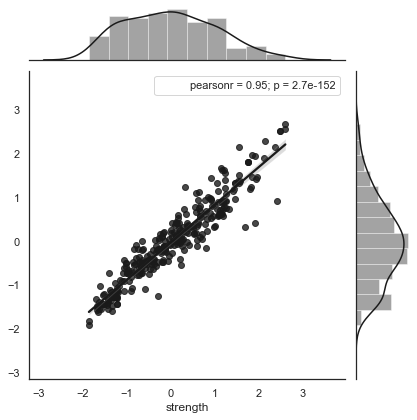

In [212]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [330]:
tempresultsdf=pd.DataFrame({'Method':['Gradient Boost'], 'Train Accuracy': gb_trainacc,'Test Accuracy':gb_testacc},index={'8'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                               Regression        0.734879       0.738512
2                                    Ridge        0.734876       0.738682
3                                    Lasso        0.656046       0.650420
4                            Decision Tree        0.994250       0.835454
5  Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                            Random Forest        0.981858       0.906829
7  Random Forest with Hypeparameter Tuning        0.941244       0.880184
8                           Gradient Boost        0.943660       0.892058

#### Hyperparameter Tuning with Grid SearchCV

In [218]:
param_grid = {'n_estimators': [100, 200, 250, 500],
              'max_depth': range(10, 31, 2), 
              'min_samples_split': range(50, 501, 10), 
              'learning_rate':[0.1, 0.2]}
clf = GridSearchCV(GradientBoostingRegressor(random_state = 1)
                   , param_grid, cv = 5, scoring= 'r2').fit(X_train, y_train)
print(clf.best_estimator_) 
print('Best Score:', clf.best_score_)

GradientBoostingRegressor(max_depth=18, min_samples_split=140, n_estimators=500,
                          random_state=1)
Best Score: 0.9215963394593659


In [219]:
# invoking the decision tree classifier function#criterion = 'mse'

gb3 = GradientBoostingRegressor(max_depth=18, min_samples_split=140, n_estimators=500,
                          random_state=1)
gb3.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=18, min_samples_split=140, n_estimators=500,
                          random_state=1)

In [251]:
y_predgb=gb3.predict(X_test)
gb3_trainacc=gb3.score(X_train,y_train)
gb3_testacc=gb3.score(X_test,y_test)
print('Training Accuracy (GB Hyperparameter tuning) : ' ,gb3_trainacc)
print('Testing Accuracy (GB yperparameter tuning): ',gb3_testacc )



Training Accuracy (GB Hyperparameter tuning) :  0.9906772781802812
Testing Accuracy (GB yperparameter tuning):  0.9316677090318916


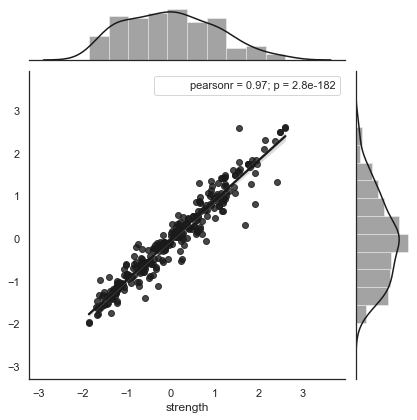

In [221]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_predgb, stat_func=pearsonr,kind="reg", color="k");

In [331]:
tempresultsdf=pd.DataFrame({'Method':['Gradient Boost with Hypeparameter Tuning'], 'Train Accuracy': gb3_trainacc,'Test Accuracy':gb3_testacc},index={'9'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                                Regression        0.734879       0.738512
2                                     Ridge        0.734876       0.738682
3                                     Lasso        0.656046       0.650420
4                             Decision Tree        0.994250       0.835454
5   Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                             Random Forest        0.981858       0.906829
7   Random Forest with Hypeparameter Tuning        0.941244       0.880184
8                            Gradient Boost        0.943660       0.892058
9  Gradient Boost with Hypeparameter Tuning        0.990677       0.931668

### Ada Boosting Regressor

In [223]:
#creating copy of the dataset
data_ab=data_scaled.copy()

In [224]:

X=data_ab.drop(['strength'],axis=1)
y=data_ab['strength']

# Spliting X&y into training and testing set in the ratio 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
ab=AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

##### Feature Importance plot using Ada Boost Regressor

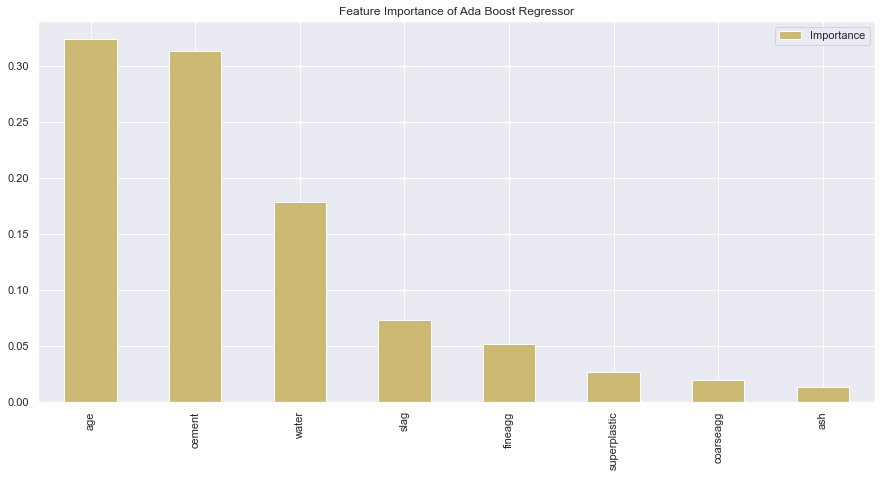

In [316]:
pd.DataFrame(ab.feature_importances_, index = data_ab.columns[:-1], 
             columns=['Importance']).sort_values('Importance',ascending=False).plot(kind='bar',color='y', figsize=(15,7), title='Feature Importance of Ada Boost Regressor')

- **cement,age & water** are important attributes
- **coarseagg,fineagg,superplastic and ash** are less important so they will not contribute much to the strength
- we found that **coarseagg,fineagg & ash** are weak contributors from the correlation map as well as the feature importance in decision tree, Hence we will **Drop these columns**

#### Dropping of ash, fineagg and coarseagg attributes

In [285]:
X=data_ab.drop(['strength','ash','fineagg','coarseagg'],axis=1)
y=data_ab['strength']

# Spliting X&y into training and testing set in the ratio 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [253]:
ab2=AdaBoostRegressor()
ab2.fit(X_train,y_train)

AdaBoostRegressor()

In [254]:
y_pred=ab2.predict(X_test)
ab_trainacc=ab2.score(X_train,y_train)
ab_testacc=ab2.score(X_test,y_test)
print('Training Accuracy (AB) : ' ,ab_trainacc)
print('Testing Accuract (AB): ',ab_testacc )


Training Accuracy (AB) :  0.8087488353497809
Testing Accuract (AB):  0.7554641302752207


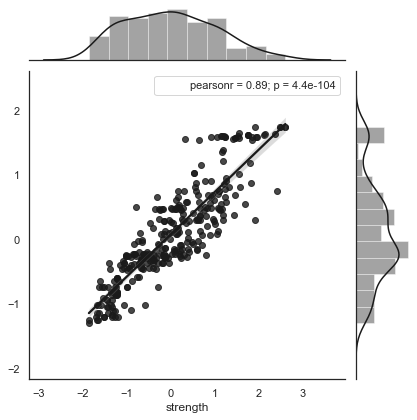

In [230]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [332]:
tempresultsdf=pd.DataFrame({'Method':['Ada Boost'], 'Train Accuracy': ab_trainacc,'Test Accuracy':ab_testacc},index={'10'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                                 Regression        0.734879       0.738512
2                                      Ridge        0.734876       0.738682
3                                      Lasso        0.656046       0.650420
4                              Decision Tree        0.994250       0.835454
5    Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                              Random Forest        0.981858       0.906829
7    Random Forest with Hypeparameter Tuning        0.941244       0.880184
8                             Gradient Boost        0.943660       0.892058
9   Gradient Boost with Hypeparameter Tuning        0.990677       0.931668
10                                 Ada Boost        0.808749       0.755464

#### Hyperparameter Tuning with Grid SearchCV

In [262]:
param_grid = {'n_estimators': [100, 200, 250, 500],
              'loss' : ['linear', 'square', 'exponential'], 
              'learning_rate':[0.1, 0.2]}
clf = GridSearchCV(AdaBoostRegressor(random_state = 1)
                   , param_grid, cv = 5, scoring= 'r2').fit(X_train, y_train)
print(clf.best_estimator_) 
print('Best Score:', clf.best_score_)

AdaBoostRegressor(learning_rate=0.2, loss='square', n_estimators=500,
                  random_state=1)
Best Score: 0.7861149349900618


In [263]:
# invoking the decision tree classifier function#criterion = 'mse'

ab3 = AdaBoostRegressor(learning_rate=0.2, loss='square', n_estimators=500,
                  random_state=1)
ab3.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.2, loss='square', n_estimators=500,
                  random_state=1)

In [264]:
y_predab=ab3.predict(X_test)
ab3_trainacc=ab3.score(X_train,y_train)
ab3_testacc=ab3.score(X_test,y_test)
print('Training Accuracy (AB Hyperparameter tuning) : ' ,ab3_trainacc)
print('Testing Accuracy (AB yperparameter tuning): ',ab3_testacc )



Training Accuracy (AB Hyperparameter tuning) :  0.8187618611755467
Testing Accuracy (AB yperparameter tuning):  0.7758267186095817


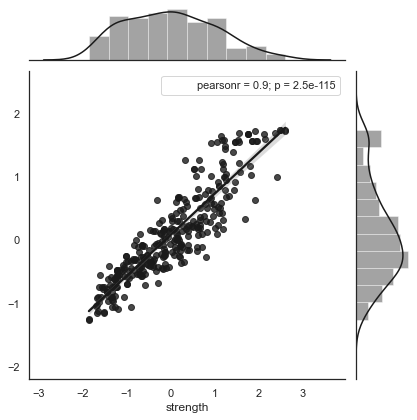

In [266]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_predab, stat_func=pearsonr,kind="reg", color="k");

In [333]:
tempresultsdf=pd.DataFrame({'Method':['Ada Boost Boost with Hypeparameter Tuning'], 'Train Accuracy': ab3_trainacc,'Test Accuracy':ab3_testacc},index={'11'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                                  Regression        0.734879       0.738512
2                                       Ridge        0.734876       0.738682
3                                       Lasso        0.656046       0.650420
4                               Decision Tree        0.994250       0.835454
5     Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                               Random Forest        0.981858       0.906829
7     Random Forest with Hypeparameter Tuning        0.941244       0.880184
8                              Gradient Boost        0.943660       0.892058
9    Gradient Boost with Hypeparameter Tuning        0.990677       0.931668
10                                  Ada Boost        0.808749       0.755464
11  Ada Boost Boost with Hypeparameter Tuning        0.818762       0.775827

### Bagging Regressor

In [256]:
br=BaggingRegressor()
br.fit(X_train,y_train)

BaggingRegressor()

In [258]:
y_pred=br.predict(X_test)
br_trainacc=br.score(X_train,y_train)
br_testacc=br.score(X_test,y_test)
print('Training Accuracy (BR) : ' ,br_trainacc)
print('Testing Accuract (BR): ',br_testacc )


Training Accuracy (BR) :  0.9765479494533592
Testing Accuract (BR):  0.8969069566393094


- The model is **overfitting** as the accuracy in train data is approximately 98% and in test it is only 90%

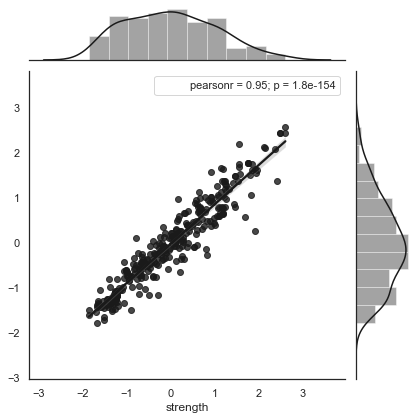

In [259]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [334]:
tempresultsdf=pd.DataFrame({'Method':['Bagging Regressor'], 'Train Accuracy': br_trainacc,'Test Accuracy':br_testacc},index={'12'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                                  Regression        0.734879       0.738512
2                                       Ridge        0.734876       0.738682
3                                       Lasso        0.656046       0.650420
4                               Decision Tree        0.994250       0.835454
5     Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                               Random Forest        0.981858       0.906829
7     Random Forest with Hypeparameter Tuning        0.941244       0.880184
8                              Gradient Boost        0.943660       0.892058
9    Gradient Boost with Hypeparameter Tuning        0.990677       0.931668
10                                  Ada Boost        0.808749       0.755464
11  Ada Boost Boost with Hypeparameter Tuning        0.818762       0.775827
12                          Bagging Regressor        0.976548       0.896907

#### Hyperparameter Tuning with Grid SearchCV

In [268]:
param_grid = {'n_estimators': [100, 200, 250, 500],
              'max_features':[2,4,6,8]}
clf = GridSearchCV(BaggingRegressor(random_state = 1)
                   , param_grid, cv = 5, scoring= 'r2').fit(X_train, y_train)
print(clf.best_estimator_) 
print('Best Score:', clf.best_score_)

BaggingRegressor(max_features=4, n_estimators=100, random_state=1)
Best Score: 0.8565345611705929


In [272]:
# invoking the decision tree classifier function#criterion = 'mse'

br2 = BaggingRegressor(max_features=4, n_estimators=100, random_state=1)
br2.fit(X_train, y_train)

BaggingRegressor(max_features=4, n_estimators=100, random_state=1)

In [273]:
y_predgb=br2.predict(X_test)
br2_trainacc=br2.score(X_train,y_train)
br2_testacc=br2.score(X_test,y_test)
print('Training Accuracy (BR Hyperparameter tuning) : ' ,br2_trainacc)
print('Testing Accuracy (BR yperparameter tuning): ',br2_testacc )



Training Accuracy (BR Hyperparameter tuning) :  0.9669680595411435
Testing Accuracy (BR yperparameter tuning):  0.8777978408251664


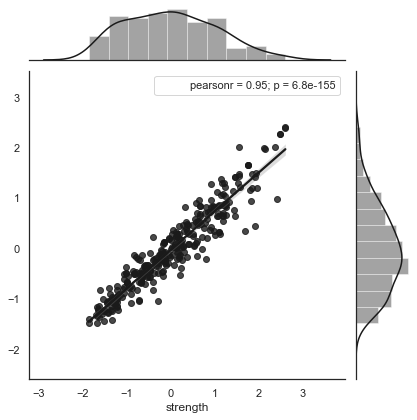

In [274]:
sns.set(style="darkgrid", color_codes=True) 
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_predgb, stat_func=pearsonr,kind="reg", color="k");

In [335]:
tempresultsdf=pd.DataFrame({'Method':['Bagging Regressor with Hypeparameter Tuning'], 'Train Accuracy': br2_trainacc,'Test Accuracy':br2_testacc},index={'13'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                                    Regression        0.734879       0.738512
2                                         Ridge        0.734876       0.738682
3                                         Lasso        0.656046       0.650420
4                                 Decision Tree        0.994250       0.835454
5       Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                                 Random Forest        0.981858       0.906829
7       Random Forest with Hypeparameter Tuning        0.941244       0.880184
8                                Gradient Boost        0.943660       0.892058
9      Gradient Boost with Hypeparameter Tuning        0.990677       0.931668
10                                    Ada Boost        0.808749       0.755464
11    Ada Boost Boost with Hypeparameter Tuning        0.818762       0.775827
12                            Bagging Regressor        0.976548       0.896907
13  Bagging Regressor with Hypeparameter Tuning        0.966968       0.877798

### KNN Regressor

In [289]:
error=[]
for i in range(1,30):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

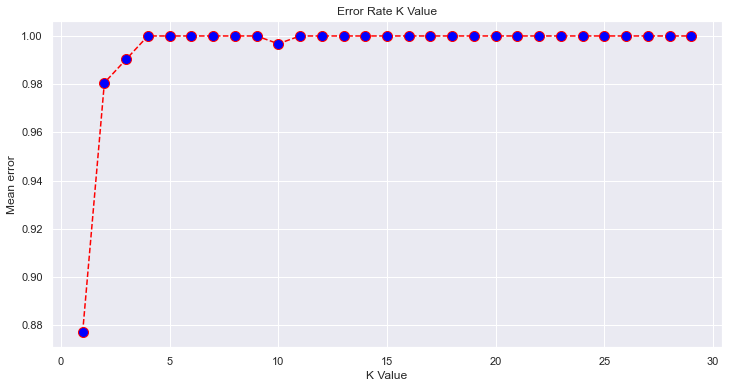

In [290]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [292]:
#k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [295]:
y_predknn=knn.predict(X_test)
knn_trainacc=knn.score(X_train,y_train)
knn_testacc=knn.score(X_test,y_test)
print('Training Accuracy (KNN ) : ' ,knn_trainacc)
print('Testing Accuracy (BKNN ): ',knn_testacc )

Training Accuracy (KNN ) :  0.914766098106188
Testing Accuracy (BKNN ):  0.8270232556232904


In [297]:
tempresultsdf=pd.DataFrame({'Method':['KNN'], 'Train Accuracy': knn_trainacc,'Test Accuracy':knn_testacc},index={'13'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                                    Regression        0.734879       0.738512
2                                         Ridge        0.734876       0.738682
3                                         Lasso        0.656046       0.650420
4                                 Decision Tree        0.994250       0.835454
5       Decision Tree with Hypeparameter Tuning        0.775682       0.720380
4                                 Random Forest        0.981879       0.908873
6       Random Forest with Hypeparameter Tuning        0.941244       0.880184
6                                 Random Forest        0.981879       0.908873
7       Random Forest with Hypeparameter Tuning        0.941244       0.880184
6                                Gradient Boost        0.943660       0.892058
7      Gradient Boost with Hypeparameter Tuning        0.990677       0.931668
6                                     Ada Boost        0.809441       0.757322
9                                     Ada Boost        0.809441       0.757322
10    Ada Boost Boost with Hypeparameter Tuning        0.826856       0.787671
7                             Bagging Regressor        0.976548       0.896907
10    Ada Boost Boost with Hypeparameter Tuning        0.818762       0.775827
12  Bagging Regressor with Hypeparameter Tuning        0.966968       0.877798
13                                          KNN        0.914766       0.827023

#### Hyperparameter Tuning with Grid SearchCV

In [307]:
param_grid = {'n_neighbors' :range(1, 21, 2),
                'weights' :['uniform','distance'],
                'metric' : ['euclidean', 'manhattan', 'minkowski']}
clf = GridSearchCV(KNeighborsRegressor()
                   , param_grid, cv = 5, scoring= 'r2').fit(X_train, y_train)
print(clf.best_estimator_) 
print('Best Score:', clf.best_score_)

KNeighborsRegressor(metric='euclidean', weights='distance')
Best Score: 0.8211638505151282


In [308]:
# invoking the decision tree classifier function#criterion = 'mse'

knn2 = KNeighborsRegressor(metric='euclidean', weights='distance')
knn2.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', weights='distance')

In [310]:
y_predgb=knn2.predict(X_test)
knn2_trainacc=knn2.score(X_train,y_train)
knn2_testacc=knn2.score(X_test,y_test)
print('Training Accuracy (knn Hyperparameter tuning) : ' ,knn2_trainacc)
print('Testing Accuracy (knn yperparameter tuning): ',knn2_testacc )



Training Accuracy (knn Hyperparameter tuning) :  0.994250323773731
Testing Accuracy (knn yperparameter tuning):  0.8457642795676894


In [336]:
tempresultsdf=pd.DataFrame({'Method':['KNN with Hypeparameter Tuning'], 'Train Accuracy': knn2_trainacc,'Test Accuracy':knn2_testacc},index={'14'})
results=pd.concat([results,tempresultsdf])
results = results[['Method', 'Train Accuracy','Test Accuracy']]
results

Method  Train Accuracy  Test Accuracy
1                                    Regression        0.734879       0.738512
2                                         Ridge        0.734876       0.738682
3                                         Lasso        0.656046       0.650420
4                                 Decision Tree        0.994250       0.835454
5       Decision Tree with Hypeparameter Tuning        0.775682       0.720380
6                                 Random Forest        0.981858       0.906829
7       Random Forest with Hypeparameter Tuning        0.941244       0.880184
8                                Gradient Boost        0.943660       0.892058
9      Gradient Boost with Hypeparameter Tuning        0.990677       0.931668
10                                    Ada Boost        0.808749       0.755464
11    Ada Boost Boost with Hypeparameter Tuning        0.818762       0.775827
12                            Bagging Regressor        0.976548       0.896907
13  Bagging Regressor with Hypeparameter Tuning        0.966968       0.877798
14                KNN with Hypeparameter Tuning        0.994250       0.845764

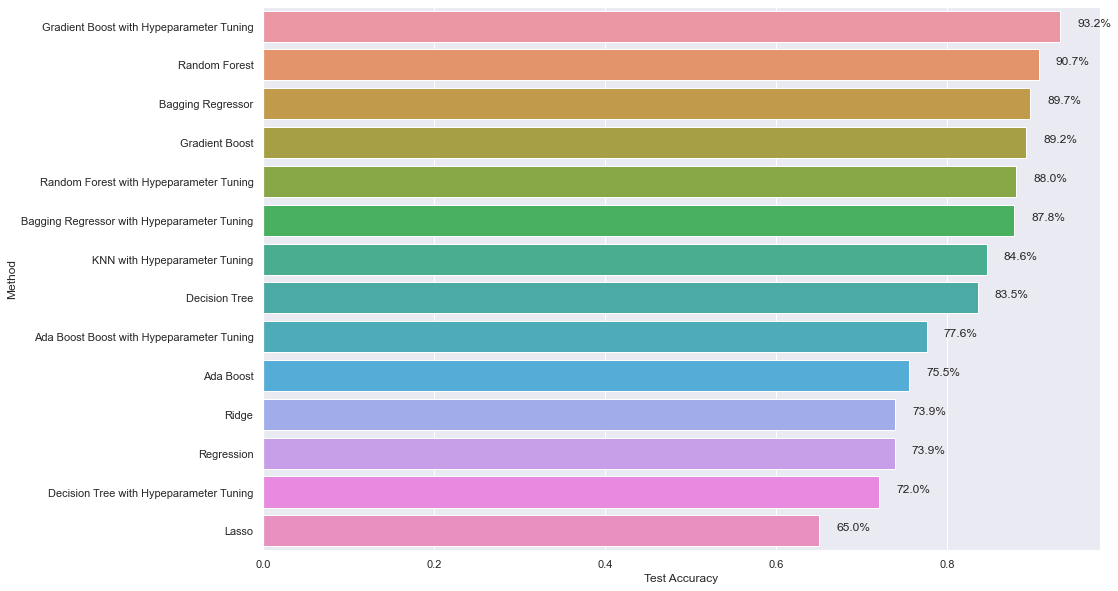

In [357]:
results=results.sort_values("Test Accuracy",ascending=False)
fig=plt.figure(figsize=(15,10))
ax=sns.barplot(y="Method", x=("Test Accuracy"),data=results)

total = len(results["Test Accuracy"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### Observation

#### * From Above Comparison we found that <span style='color:red'>Random forest & Gradient boost Models</span> Have high Performance compared to other so These algorithms are Suitable for this project
#### * the Overfitting is reduced while doing Hyper Parameter Tuning

## Model performance range at 95% confidence level

### Bootstrap Sampling using <span style='color:green'> Gradient Boosting Regressor</span>

In [359]:
data_scaled.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.603837 -0.847144  1.038806     -1.070393  -0.014398 -0.312289   
1 -1.074790 -0.367612  1.096078 -1.099025      0.812800   1.388141  0.287169   
2 -0.298384 -0.857572  0.648965  0.277322     -0.111360  -0.206121  1.104041   
3 -0.145209  0.466016 -0.847144  2.197586     -1.070393  -0.526517 -1.298819   
4 -1.209776  1.271779 -0.847144  0.556375      0.516371   0.958372 -0.963273   

        age  strength  
0 -0.276792 -0.354999  
1 -0.683574 -0.737503  
2 -0.276792 -0.395168  
3 -0.276792  0.601862  
4 -0.276792 -1.050462

In [360]:
values=data_scaled.values

In [374]:

from sklearn.metrics import r2_score
# Number of bootstrap samples to create
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(data_scaled) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = GradientBoostingRegressor(random_state=1, max_depth=12, 
                                min_samples_split=100, n_estimators=200, 
                                learning_rate=0.2)
    
    model.fit(train[:,:-1], train[:,-1])
    
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    print(score)
    stats.append(score)

0.9038266545815575
0.874539367638236
0.8966629528762807
0.8989612600737938
0.8838462951167405
0.8735414865302189
0.8877556800952466
0.9035190654153593
0.893131067336586
0.9076041091293015
0.8847493810287912
0.8965993850585582
0.897601896474527
0.9045314975986309
0.8598264710512997
0.8972082339166957
0.8750462295527839
0.9049422966435408
0.8917337478103821
0.8610421693738401
0.897780837866838
0.848067859927261
0.9020471359560666
0.8904186102890808
0.9042600233787953
0.9137509476349603
0.8996899072760686
0.8943293409536078
0.884793221986766
0.9031403488370491
0.8832045861562495
0.8917078305577335
0.9042299830636248
0.8846189361718273
0.880224206341978
0.8874489907548234
0.9089644885332175
0.8922369308486324
0.8930646573089774
0.8730721815863933
0.8898067804130136
0.890356860616768
0.8917414931787849
0.8959513776378649
0.901997065699217
0.9100547146485268
0.8717046753851106
0.9069505648406765
0.894554115324857
0.907265494269605
0.8988584683927417
0.8914047507812638
0.8890950161305478
0.88

0.8820650885565864
0.8742639126339737
0.8941141882651945
0.8886965501728048
0.8817701454947229
0.9033559000207982
0.9031539192139929
0.9168498291909023
0.891227273449378
0.9012002516113511
0.8971245763852083
0.8826240858325896
0.8950463089001883
0.8783160794313298
0.8826943817039615
0.8986637820715573
0.9019220344077215
0.8873760500653626
0.9006997978062216
0.8847721690489452
0.9127571023018286
0.9024305309001839
0.9032355931628646
0.8967759113345963
0.897366032272566
0.8964564096201355
0.9037492497439712
0.9029750136677511
0.8902129087188525
0.8911490020211916
0.897191769926333
0.9022876594574086
0.8924762985268008
0.8983576269459378
0.8967191088627298
0.8807276976947518
0.889340416720341
0.8760045243776994
0.9042111657791152
0.91446393745761
0.8996214238884135
0.9002971638155661
0.891293223211794
0.8840397398072761
0.8853876103942075
0.9125227291409326
0.8742500010149394
0.8828424415953218
0.8714260496706213
0.8687511312761794
0.8852568286469631
0.8943435323040396
0.9018205553944342


0.8845597243059737
0.914789507578282
0.8887119312653269
0.8969551337361914
0.8939476112457169
0.8772818662476511
0.900689724564177
0.8747947483685389
0.9190048785889128
0.8903479858989224
0.8654856653820037
0.902842322933377
0.9027794652225745
0.8786113326934414
0.8882835824420904
0.8775230620805684
0.8740320667066797
0.8800000505550234
0.9062085457145479
0.8895877901211462
0.9012241712571866
0.8925346057431212
0.8986144696019726
0.8857208906218988
0.906748046152527
0.9022027911177934
0.8825852399108973
0.8984491459767892
0.8984815092761161
0.8922115333333791
0.8975709082912767
0.8976042830038145
0.8905460701422376
0.8795413188355896
0.8772025707057118
0.8964195011179382
0.9005812729207543
0.8966891037970424
0.8764694347191306
0.8889514491341411
0.8921685883632701
0.8973424448777324
0.8940643828844186
0.895427150246083
0.9058041702451065
0.9075918899319818
0.8841359111937183
0.8777609715025876
0.9060221685488803
0.9016539973158034
0.8721763162701202
0.8945123708985037
0.866985258101698

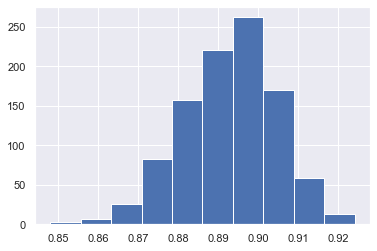

95.0 confidence interval 86.8% and 91.4%


In [384]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100));

### Bootstrap Sampling using <span style='color:green'> Random Forest Regressor</span>

In [388]:
# Number of bootstrap samples to create
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(data_scaled) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = RandomForestRegressor(n_estimators=100)
    
    model.fit(train[:,:-1], train[:,-1])
    
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    print(score)
    stats.append(score)

0.8627098300696732
0.8491667863407336
0.8607272042299474
0.8421632598801775
0.842784107800663
0.8617234095405308
0.8512584544146514
0.8276123624501743
0.8725930419569611
0.873822231438247
0.8630128747244007
0.8555529186067135
0.8275203787768599
0.8594897243164105
0.8512387305814867
0.8493197244815044
0.8566362175862529
0.8536557315269264
0.8713662467065677
0.8319760044265079
0.8381572166347049
0.8424300369444145
0.8604433114455816
0.82587031022439
0.8376500064250876
0.8376786177229317
0.8772907310170598
0.8687177195779133
0.8378468811279582
0.8778981382639662
0.8653492228452523
0.8610618469210707
0.8700055658247678
0.8503206186765266
0.8589663497364624
0.8684326304529395
0.8649875361221224
0.8403460484928207
0.884582327274259
0.8627534836665197
0.8457982983647171
0.8630210837613055
0.8585534164941522
0.8764575801622361
0.8489741565732016
0.8548766838663624
0.8256993050988617
0.8641870598167556
0.8842144067277301
0.8697321959588062
0.8611916381291811
0.846638924095465
0.8546926425192322

0.8651598509353842
0.8636535838819572
0.8585762755190117
0.8661664874005621
0.8380741598921706
0.8655143612314286
0.868182780258078
0.87569116338563
0.8593060277017446
0.8517253524304561
0.8646540825711551
0.8885490131085098
0.8440032155269487
0.8779434039939862
0.8585819274758945
0.8318954095962524
0.8627266159063369
0.8482828005159958
0.8578558679568207
0.8768247517235279
0.8399792665864408
0.8730048891534942
0.8654432093287551
0.8384409820675057
0.8462831251424605
0.8611461774680674
0.8608934852385206
0.8618260570026308
0.8820035097848683
0.8623150979434594
0.8517091569556104
0.8663977711849407
0.8562784455661065
0.8653515330991218
0.8527344323476594
0.8509309852976198
0.8630772410612322
0.8395008387211638
0.8671738979050652
0.8731910958466156
0.846811503342833
0.8628038278672351
0.8562714135992524
0.8608532051580196
0.8308191228826992
0.8894435772249785
0.8546574887494284
0.8620109559258194
0.8440894218554327
0.8376081356613008
0.858850608253911
0.8566600412964084
0.885971927242425

0.8887706369268398
0.8972813883638932
0.8702119427286243
0.8502852045589537
0.8544145017736777
0.8549636670640213
0.8594320816200153
0.8384724284973
0.8431846076152297
0.8664108766112513
0.875306777303228
0.8532376502626404
0.8590633101262086
0.8570900945385928
0.8454519126608584
0.8588404454113518
0.843235333752234
0.8624919095746888
0.8645680398457118
0.8597575374326607
0.8670147104478074
0.85531523128848
0.8608783055734446
0.8757418220084997
0.8654174482976931
0.8738439247844677
0.8550110984435239
0.8559741738651745
0.8579811397217705
0.8598779520736762
0.8803937264691947
0.871828114324078
0.8609352275458267
0.8453226888828874
0.8473769449708062
0.873973573369626
0.870310945132333
0.8512878899785358
0.8467184639321126
0.8530547141714139
0.8574256678010883
0.8734013108489138
0.8561378201346661
0.8503714544500747
0.8834730150250615
0.8368097293156878
0.8455335475977327
0.853636872680293
0.8503135602390595
0.8509952995203431
0.8228928390152835
0.8520127080512164
0.8409652855938801
0.86

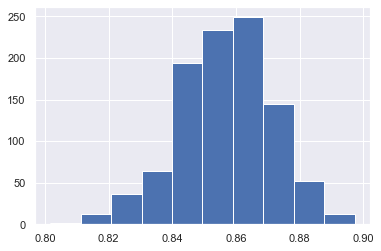

95.0 confidence interval 82.5% and 88.4%


In [389]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

 ## <span style='color:red'> Conclusion</span>

#### From above results we found that
 - **Gradient Boosting Regressor and Random Forest Regressor** in Performing well on training and testing data compared to other models
 - At **95% confidence interval Gradient boosting** model gave the **best performance  between 86.8% and 91.4%** which is better than **Random forest which is between 82.5 and 88.4%**
 - Feature importance were calculated using decision trees, Random forest regressor, Grandient boost regressor and Ada boost regressor.most of them shown **Age & Cement as the Important Feature**
 
 - Outliers where Identified using boxplot and was replaced by median
 - No missing values are present in the model 
 - Hyper parameter tuning has reduced the Overfitting of models
 - K-Means clusturing was not sucessfull as the clusters where overlaping
 - PCA is not usefull for models with less attributes 
 - Complex models will give more Accuracy compared to simple linear models 
 